# Project 2


In [ ]:
! pip install colabcode   #remove in local ipynb

#Load the data sets (from google drive)

In [ ]:
from google.colab import drive    #remove in local ipynb
drive.mount('/content/drive/')    #remove in local ipynb

Mounted at /content/drive/


Path

In [ ]:
%cd /content/drive/My Drive/datasets/
#remove in local ipynb

[Errno 2] No such file or directory: '/content/drive/My Drive/datasets/'
/content


#Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os


# Reading the dataset

# Helper functions for plotting

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
train = pd.read_csv('UNSW_NB15_training-set.csv', na_values=['-', '?'])
train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,NaN,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
test = pd.read_csv('/content/UNSW_NB15_training-set.csv', na_values=['-', '?'])
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,NaN,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


###Finding categorical columns

In [ ]:
train_columns = []
test_columns = []

for col in train.columns:
  num_unique = len(train[col].unique())
  #print(num_unique)
  if(num_unique < 5):
    train_columns.append(col)

for col in test.columns:
  num_unique = len(test[col].unique())
  #print(num_unique)
  if(num_unique < 5):
    test_columns.append(col)

#Matching columns are the categorical columns
#print(train_columns, test_columns)
categorical_columns = list(set(train_columns).intersection(test_columns))
categorical_columns.remove('label')   #y value  (attack_cat <> label)

categorical_columns

['ct_ftp_cmd', 'is_ftp_login', 'is_sm_ips_ports']

# Filtering the categorical data



In [ ]:
print(train.shape)
print(test.shape)

(175341, 45)
(175341, 45)


In [ ]:
#for identifing the unique in each of the dataset
def filter_unique_categories(train, test, column):
    train_unique = train[column].unique()
    test_unique = test[column].unique()

    common_categories = np.intersect1d(train_unique, test_unique)
    train = train[train[column].isin(common_categories)]
    test = test[test[column].isin(common_categories)]
    return train, test

# applying filter to each catogeriacal column
for column in categorical_columns:
    train, test = filter_unique_categories(train, test, column)

print(train.shape)
print(test.shape)

(175341, 45)
(175341, 45)


# Dropping rows with missing values




In [ ]:
df_train = train.dropna()
df_test = test.dropna()

print(df_train.shape, df_test.shape)

df_train

(81173, 45) (81173, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
# savepoint - data cleaning/management done
df_train.to_csv('cleaned_train.csv', index=False)
df_test.to_csv('cleaned_test.csv', index=False)

#loading
df_train = pd.read_csv('cleaned_train.csv')
df_test = pd.read_csv('cleaned_test.csv')

# Encoding the data


###Libraries and Functions

In [ ]:
from collections.abc import Sequence
from sklearn import preprocessing

#for Classification
def to_xy(df, target):
    # Separate features and target variable
    x = df.drop(columns=[target])  # Drop the target column to get features
    y = pd.get_dummies(df[target])  # one-hot encoding for outputs

    # Convert the resulting arrays to float32
    return x.values.astype(np.float32), y.values.astype(np.float32)

def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

#encode for numeric values
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

### Encoding categorical values

In [ ]:
df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)

#set y values to either 'label' or 'attack_cat' (not using)
df_train.drop('attack_cat', axis=1, inplace=True)
df_test.drop('attack_cat', axis=1, inplace=True)

#make other textual columns dummies
for df in [df_train, df_test]:
    encode_text_dummy(df, 'proto')
    encode_text_dummy(df, 'service')
    encode_text_dummy(df, 'state')
    encode_text_dummy(df, 'ct_ftp_cmd')
    encode_text_dummy(df, 'is_ftp_login')
    encode_text_dummy(df, 'is_sm_ips_ports')

#encode y values for both dataframe that we are using
attacks_train = encode_text_index(df_train, "label")
attacks_test = encode_text_index(df_test, "label")

In [ ]:
df_train

### Normalization (numeric values)

In [ ]:
features = [
    'dur',
    'spkts',
    'dpkts',
    'sbytes',
    'dbytes',
    'rate',
    'sttl',
    'dttl',
    'sload',
    'dload',
    'sloss',
    'dloss',
    'sinpkt',
    'dinpkt',
    'sjit',
    'djit',
    'swin',
    'stcpb',
    'dtcpb',
    'dwin',
    'tcprtt',
    'synack',
    'ackdat',
    'smean',
    'dmean',
    'trans_depth',
    'response_body_len',
    'ct_srv_src',
    'ct_state_ttl',
    'ct_dst_ltm',
    'ct_src_dport_ltm',
    'ct_dst_sport_ltm',
    'ct_dst_src_ltm',
    'ct_flw_http_mthd',
    'ct_src_ltm',
    'ct_srv_dst']

for df in [df_train, df_test]:
    for i in features:
        encode_numeric_zscore(df, i)

In [ ]:
df_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state-RST,ct_ftp_cmd-0,ct_ftp_cmd-1,ct_ftp_cmd-2,ct_ftp_cmd-4,is_ftp_login-0,is_ftp_login-1,is_ftp_login-2,is_ftp_login-4,is_sm_ips_ports-0
0,0.174677,-0.048030,-0.044580,-0.055932,-0.077782,-0.624123,-1.042527,1.554587,-0.610101,-0.216534,...,False,False,True,False,False,False,True,False,False,True
1,0.266079,0.216764,0.076680,0.169685,-0.069496,-0.623956,-1.042527,1.554587,-0.607521,-0.211838,...,False,True,False,False,False,True,False,False,False,True
2,-0.198900,-0.100988,-0.135525,-0.057916,-0.082207,2.287049,0.822646,-0.717582,2.795841,-0.219823,...,False,True,False,False,False,True,False,False,False,True
3,-0.111472,-0.058621,-0.074895,-0.054992,-0.075909,-0.623952,-1.042527,1.554587,-0.609941,-0.200730,...,False,True,False,False,False,True,False,False,False,True
4,-0.123810,-0.058621,-0.090052,-0.054433,-0.080667,-0.623945,0.822646,1.554587,-0.609873,-0.214631,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,-0.198899,-0.100988,-0.135525,-0.058014,-0.082207,0.346214,0.822646,-0.717582,0.327742,-0.219823,...,False,True,False,False,False,True,False,False,False,True
81169,-0.198899,-0.100988,-0.135525,-0.058014,-0.082207,0.022742,0.822646,-0.717582,0.015117,-0.219823,...,False,True,False,False,False,True,False,False,False,True
81170,-0.198899,-0.100988,-0.135525,-0.058014,-0.082207,0.022742,0.822646,-0.717582,0.015117,-0.219823,...,False,True,False,False,False,True,False,False,False,True
81171,-0.198899,-0.100988,-0.135525,-0.058014,-0.082207,0.022742,0.822646,-0.717582,0.015117,-0.219823,...,False,True,False,False,False,True,False,False,False,True


### Split input/output values

In [ ]:
XTrain = df_train.drop(["label"], axis=1).copy()
YTrain = df_train["label"].copy()
XTest = df_test.drop(["label"], axis=1).copy()
YTest = df_test["label"].copy()

x_train = np.array(np.array(XTrain).astype(float))
x_test = np.array(np.array(XTest).astype(float))
y_train = np.array(YTrain)
y_test = np.array(YTest)

In [ ]:
print("XTrain shape:", XTrain.shape)
print("YTrain shape:", YTrain.shape)
print("x_test shape:", x_test.shape)
print("x_train shape:", x_train.shape)
print("y_test shape:", y_test.shape)
print("y_train shape:", y_train.shape)

XTrain shape: (81173, 64)
YTrain shape: (81173,)
x_test shape: (81173, 64)
x_train shape: (81173, 64)
y_test shape: (81173,)
y_train shape: (81173,)


In [ ]:
print("x_train shape:", x_train.shape[0])
print("y_train shape:", y_train.shape[1])

x_train shape: 81173
y_train shape: 2


#Define CNN


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1, 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1], 1, 1)

input_shape = (x_train.shape[1], 1, 1)

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,1), strides = (1, 1),
                padding = "valid",  activation = "relu",
                input_shape = input_shape))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 60, 1, 32)           │             128 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128 (512.00 B)

 Trainable params: 128 (512.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Conv2D(64, (3, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 1), strides=None))
model.add(Dropout(0.25))


In [ ]:
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))


#Compiling the model


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:

x_train.shape

(81157, 62)

#Training the model

In [ ]:
# NOT DONE YET Have to do the early stopping here first and then train
import time

start_time = time.time()

batch_size = 512


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=2,
          validation_data=(x_test, y_test))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))


Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 62), dtype=float32). Expected shape (None, 62, 1, 1), but input has incompatible shape (None, 62)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 62), dtype=float32)
  • training=True
  • mask=None

# Fully-Connected Nueral Network
+ Modifying hyperparams by parameter grid


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 6s - 9ms/step - accuracy: 0.9730 - loss: 0.1007 - val_accuracy: 0.9779 - val_loss: 0.0657
Epoch 2/100
635/635 - 2s - 4ms/step - accuracy: 0.9781 - loss: 0.0571 - val_accuracy: 0.9786 - val_loss: 0.0525
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9791 - loss: 0.0511 - val_accuracy: 0.9804 - val_loss: 0.0493
Epoch 4/100
635/635 - 3s - 4ms/step - accuracy: 0.9798 - loss: 0.0485 - val_accuracy: 0.9813 - val_loss: 0.0471
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9804 - loss: 0.0470 - val_accuracy: 0.9812 - val_loss: 0.0456
Epoch 6/100
635/635 - 2s - 4ms/step - accuracy: 0.9807 - loss: 0.0456 - val_accuracy: 0.9817 - val_loss: 0.0453
Epoch 7/100
635/635 - 2s - 4ms/step - accuracy: 0.9811 - loss: 0.0450 - val_accuracy: 0.9815 - val_loss: 0.0443
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9813 - loss: 0.0443 - val_accuracy: 0.9813 - val_loss: 0.0438
Epoch 9/100
635/635 - 3s - 4ms/step - accuracy: 0.9812 - loss: 0.0439 - val_accuracy: 0.9818 - val_loss: 0.0435
Epoc

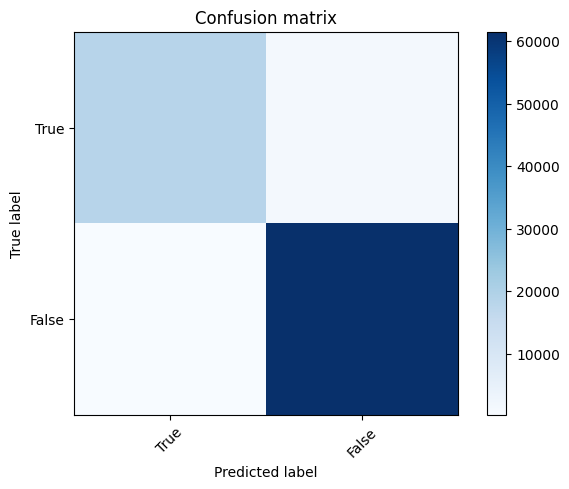

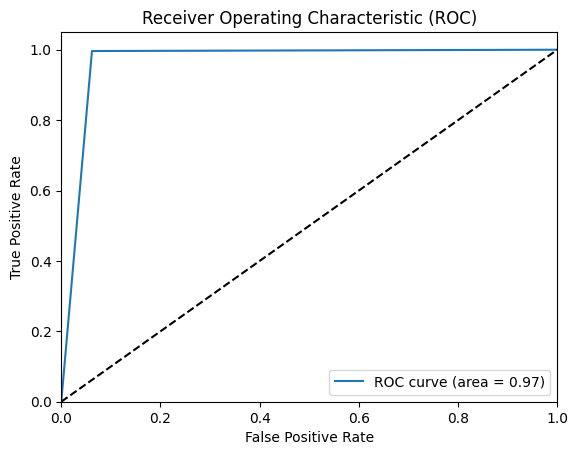

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.9556 - loss: 0.2017 - val_accuracy: 0.9769 - val_loss: 0.1227
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9770 - loss: 0.1088 - val_accuracy: 0.9773 - val_loss: 0.0989
Epoch 3/100
635/635 - 3s - 4ms/step - accuracy: 0.9773 - loss: 0.0928 - val_accuracy: 0.9774 - val_loss: 0.0875
Epoch 4/100
635/635 - 2s - 4ms/step - accuracy: 0.9776 - loss: 0.0838 - val_accuracy: 0.9775 - val_loss: 0.0806
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9776 - loss: 0.0781 - val_accuracy: 0.9778 - val_loss: 0.0758
Epoch 6/100
635/635 - 3s - 5ms/step - accuracy: 0.9777 - loss: 0.0741 - val_accuracy: 0.9778 - val_loss: 0.0725
Epoch 7/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.0713 - val_accuracy: 0.9777 - val_loss: 0.0701
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9779 - loss: 0.0692 - val_accuracy: 0.9779 - val_loss: 0.0682
Epoch 9/100
635/635 - 3s - 4ms/step - accuracy: 0.9779 - loss: 0.0675 - val_accuracy: 0.9779 - val_loss: 0.0667
Epoc

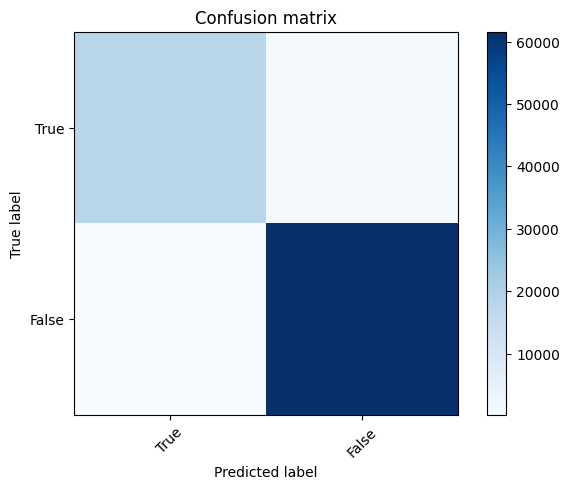

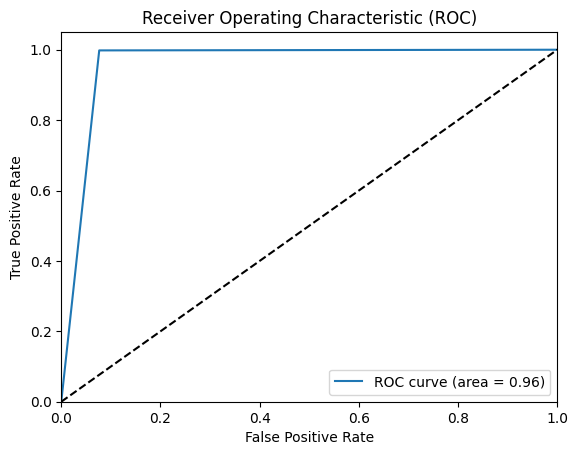

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 4s - 6ms/step - accuracy: 0.9752 - loss: 0.0941 - val_accuracy: 0.9776 - val_loss: 0.0586
Epoch 2/100
635/635 - 4s - 7ms/step - accuracy: 0.9785 - loss: 0.0543 - val_accuracy: 0.9789 - val_loss: 0.0506
Epoch 3/100
635/635 - 5s - 7ms/step - accuracy: 0.9799 - loss: 0.0496 - val_accuracy: 0.9802 - val_loss: 0.0472
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9802 - loss: 0.0471 - val_accuracy: 0.9813 - val_loss: 0.0451
Epoch 5/100
635/635 - 3s - 5ms/step - accuracy: 0.9809 - loss: 0.0455 - val_accuracy: 0.9806 - val_loss: 0.0485
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9811 - loss: 0.0445 - val_accuracy: 0.9817 - val_loss: 0.0437
Epoch 7/100
635/635 - 2s - 4ms/step - accuracy: 0.9814 - loss: 0.0442 - val_accuracy: 0.9813 - val_loss: 0.0436
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9817 - loss: 0.0433 - val_accuracy: 0.9819 - val_loss: 0.0419
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9816 - loss: 0.0428 - val_accuracy: 0.9807 - val_loss: 0.0451
Epoc

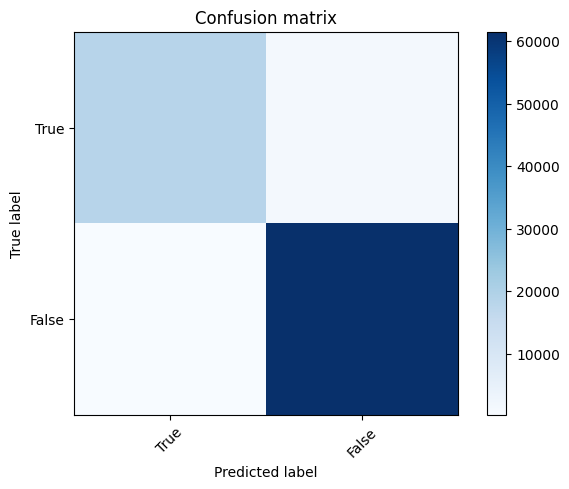

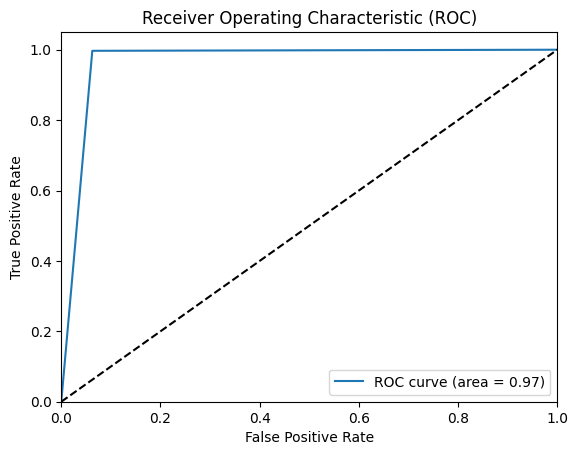

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.9550 - loss: 0.1855 - val_accuracy: 0.9770 - val_loss: 0.1082
Epoch 2/100
635/635 - 4s - 6ms/step - accuracy: 0.9772 - loss: 0.0976 - val_accuracy: 0.9775 - val_loss: 0.0898
Epoch 3/100
635/635 - 3s - 5ms/step - accuracy: 0.9776 - loss: 0.0851 - val_accuracy: 0.9776 - val_loss: 0.0812
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9777 - loss: 0.0786 - val_accuracy: 0.9777 - val_loss: 0.0762
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9777 - loss: 0.0746 - val_accuracy: 0.9777 - val_loss: 0.0730
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9777 - loss: 0.0719 - val_accuracy: 0.9777 - val_loss: 0.0707
Epoch 7/100
635/635 - 3s - 4ms/step - accuracy: 0.9778 - loss: 0.0699 - val_accuracy: 0.9778 - val_loss: 0.0690
Epoch 8/100
635/635 - 2s - 4ms/step - accuracy: 0.9777 - loss: 0.0683 - val_accuracy: 0.9777 - val_loss: 0.0676
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.0670 - val_accuracy: 0.9778 - val_loss: 0.0664
Epoc

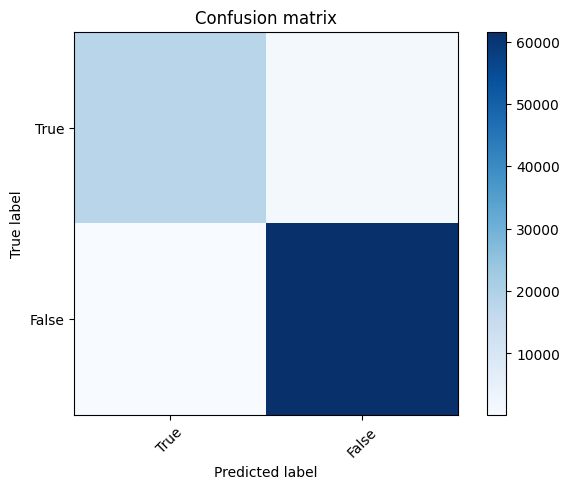

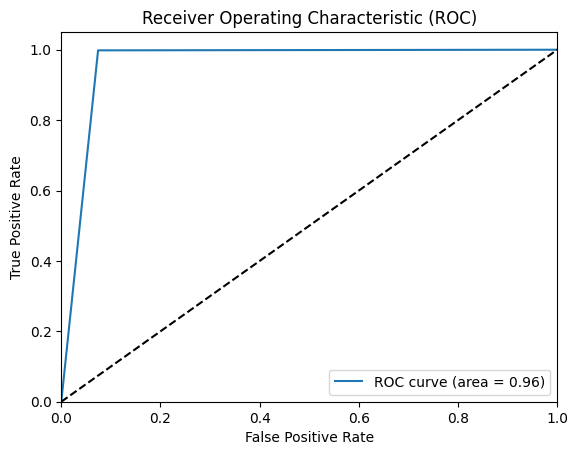

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 6s - 9ms/step - accuracy: 0.9734 - loss: 0.0904 - val_accuracy: 0.9784 - val_loss: 0.0543
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9792 - loss: 0.0513 - val_accuracy: 0.9797 - val_loss: 0.0480
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9806 - loss: 0.0476 - val_accuracy: 0.9815 - val_loss: 0.0451
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9816 - loss: 0.0452 - val_accuracy: 0.9800 - val_loss: 0.0466
Epoch 5/100
635/635 - 3s - 4ms/step - accuracy: 0.9814 - loss: 0.0445 - val_accuracy: 0.9805 - val_loss: 0.0445
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9819 - loss: 0.0437 - val_accuracy: 0.9802 - val_loss: 0.0471
Epoch 7/100
635/635 - 2s - 4ms/step - accuracy: 0.9820 - loss: 0.0430 - val_accuracy: 0.9826 - val_loss: 0.0415
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9819 - loss: 0.0428 - val_accuracy: 0.9825 - val_loss: 0.0425
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9821 - loss: 0.0417 - val_accuracy: 0.9831 - val_loss: 0.0401
Epoc

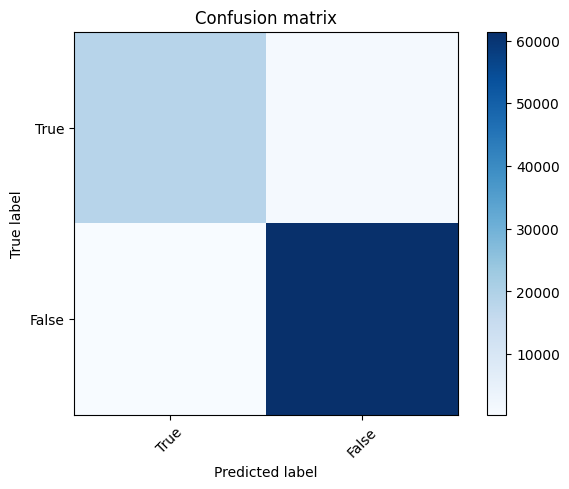

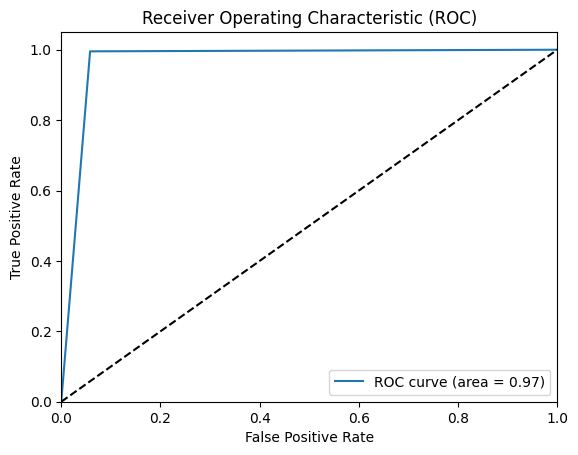

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 4s - 6ms/step - accuracy: 0.9648 - loss: 0.1873 - val_accuracy: 0.9776 - val_loss: 0.1098
Epoch 2/100
635/635 - 3s - 5ms/step - accuracy: 0.9775 - loss: 0.0987 - val_accuracy: 0.9776 - val_loss: 0.0905
Epoch 3/100
635/635 - 3s - 4ms/step - accuracy: 0.9776 - loss: 0.0856 - val_accuracy: 0.9777 - val_loss: 0.0814
Epoch 4/100
635/635 - 3s - 5ms/step - accuracy: 0.9777 - loss: 0.0785 - val_accuracy: 0.9778 - val_loss: 0.0759
Epoch 5/100
635/635 - 3s - 4ms/step - accuracy: 0.9778 - loss: 0.0742 - val_accuracy: 0.9778 - val_loss: 0.0726
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9778 - loss: 0.0713 - val_accuracy: 0.9778 - val_loss: 0.0701
Epoch 7/100
635/635 - 2s - 3ms/step - accuracy: 0.9779 - loss: 0.0692 - val_accuracy: 0.9779 - val_loss: 0.0682
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9779 - loss: 0.0674 - val_accuracy: 0.9778 - val_loss: 0.0667
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9779 - loss: 0.0660 - val_accuracy: 0.9779 - val_loss: 0.0653
Epoc

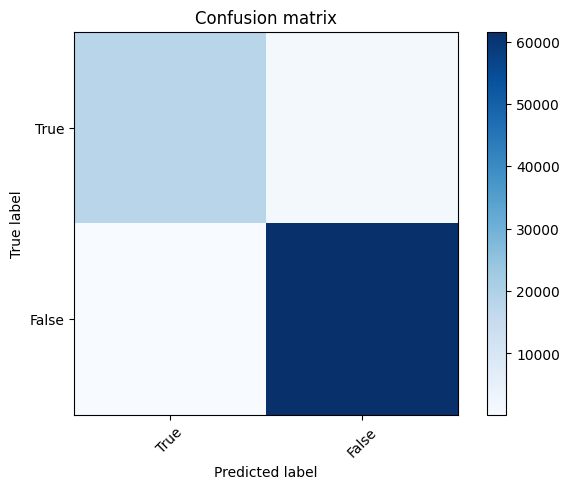

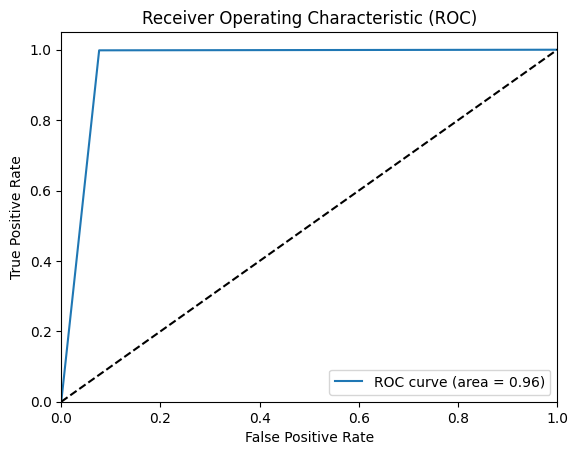

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 4s - 7ms/step - accuracy: 0.9731 - loss: 0.0913 - val_accuracy: 0.9787 - val_loss: 0.0563
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9797 - loss: 0.0498 - val_accuracy: 0.9799 - val_loss: 0.0467
Epoch 3/100
635/635 - 3s - 5ms/step - accuracy: 0.9811 - loss: 0.0459 - val_accuracy: 0.9794 - val_loss: 0.0486
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9810 - loss: 0.0447 - val_accuracy: 0.9814 - val_loss: 0.0435
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9817 - loss: 0.0434 - val_accuracy: 0.9821 - val_loss: 0.0419
Epoch 6/100
635/635 - 3s - 5ms/step - accuracy: 0.9820 - loss: 0.0426 - val_accuracy: 0.9824 - val_loss: 0.0422
Epoch 7/100
635/635 - 3s - 4ms/step - accuracy: 0.9819 - loss: 0.0419 - val_accuracy: 0.9803 - val_loss: 0.0454
Epoch 8/100
635/635 - 2s - 4ms/step - accuracy: 0.9822 - loss: 0.0414 - val_accuracy: 0.9820 - val_loss: 0.0408
Epoch 9/100
635/635 - 3s - 5ms/step - accuracy: 0.9828 - loss: 0.0407 - val_accuracy: 0.9807 - val_loss: 0.0471
Epoc

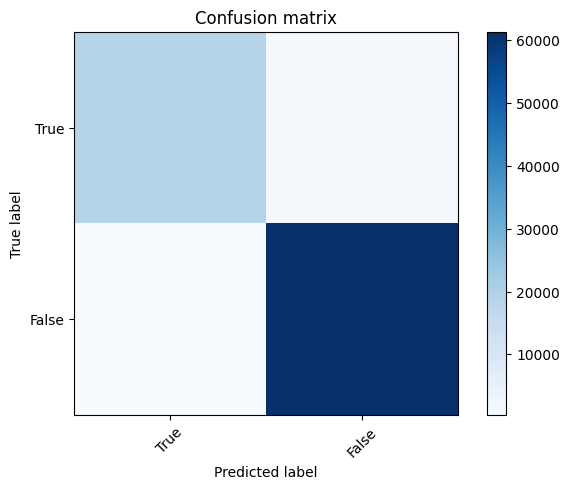

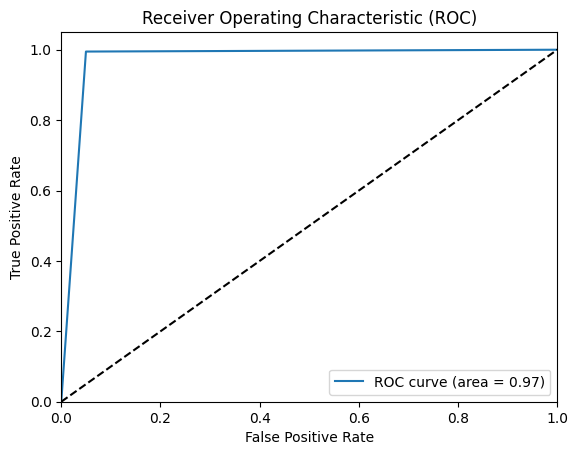

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.9331 - loss: 0.2196 - val_accuracy: 0.9772 - val_loss: 0.0976
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9775 - loss: 0.0853 - val_accuracy: 0.9776 - val_loss: 0.0777
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9779 - loss: 0.0742 - val_accuracy: 0.9779 - val_loss: 0.0715
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.0698 - val_accuracy: 0.9778 - val_loss: 0.0682
Epoch 5/100
635/635 - 3s - 5ms/step - accuracy: 0.9778 - loss: 0.0672 - val_accuracy: 0.9778 - val_loss: 0.0660
Epoch 6/100
635/635 - 4s - 7ms/step - accuracy: 0.9779 - loss: 0.0652 - val_accuracy: 0.9778 - val_loss: 0.0643
Epoch 7/100
635/635 - 2s - 3ms/step - accuracy: 0.9779 - loss: 0.0637 - val_accuracy: 0.9781 - val_loss: 0.0629
Epoch 8/100
635/635 - 3s - 4ms/step - accuracy: 0.9782 - loss: 0.0623 - val_accuracy: 0.9782 - val_loss: 0.0616
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9783 - loss: 0.0610 - val_accuracy: 0.9785 - val_loss: 0.0605
Epoc

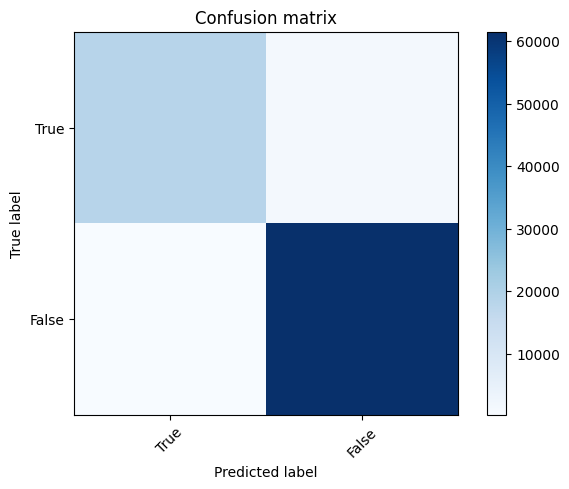

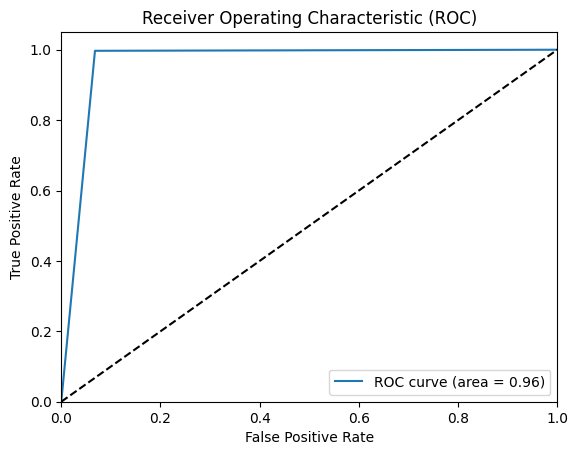

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 4s - 7ms/step - accuracy: 0.9755 - loss: 0.0779 - val_accuracy: 0.9793 - val_loss: 0.0505
Epoch 2/100
635/635 - 2s - 4ms/step - accuracy: 0.9804 - loss: 0.0473 - val_accuracy: 0.9816 - val_loss: 0.0447
Epoch 3/100
635/635 - 3s - 4ms/step - accuracy: 0.9813 - loss: 0.0448 - val_accuracy: 0.9815 - val_loss: 0.0431
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9816 - loss: 0.0435 - val_accuracy: 0.9818 - val_loss: 0.0429
Epoch 5/100
635/635 - 3s - 4ms/step - accuracy: 0.9822 - loss: 0.0422 - val_accuracy: 0.9829 - val_loss: 0.0403
Epoch 6/100
635/635 - 2s - 3ms/step - accuracy: 0.9823 - loss: 0.0415 - val_accuracy: 0.9825 - val_loss: 0.0416
Epoch 7/100
635/635 - 3s - 5ms/step - accuracy: 0.9825 - loss: 0.0412 - val_accuracy: 0.9833 - val_loss: 0.0390
Epoch 8/100
635/635 - 2s - 4ms/step - accuracy: 0.9825 - loss: 0.0408 - val_accuracy: 0.9825 - val_loss: 0.0398
Epoch 9/100
635/635 - 3s - 4ms/step - accuracy: 0.9828 - loss: 0.0401 - val_accuracy: 0.9836 - val_loss: 0.0388
Epoc

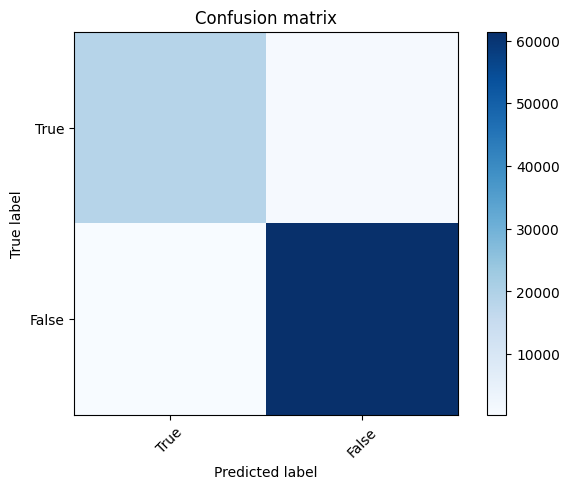

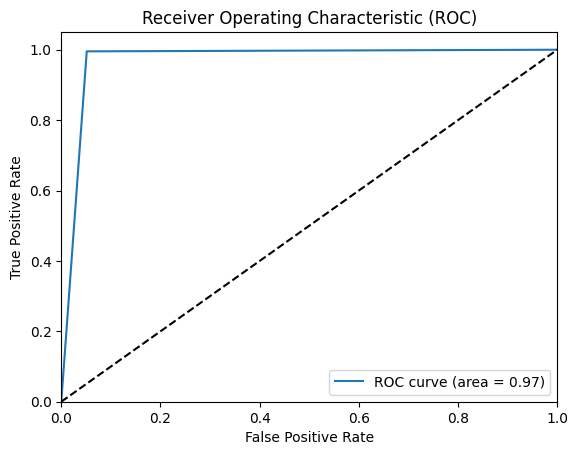

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.9473 - loss: 0.2018 - val_accuracy: 0.9765 - val_loss: 0.1080
Epoch 2/100
635/635 - 4s - 6ms/step - accuracy: 0.9773 - loss: 0.0933 - val_accuracy: 0.9776 - val_loss: 0.0839
Epoch 3/100
635/635 - 3s - 4ms/step - accuracy: 0.9778 - loss: 0.0793 - val_accuracy: 0.9778 - val_loss: 0.0755
Epoch 4/100
635/635 - 2s - 4ms/step - accuracy: 0.9779 - loss: 0.0732 - val_accuracy: 0.9778 - val_loss: 0.0714
Epoch 5/100
635/635 - 3s - 4ms/step - accuracy: 0.9780 - loss: 0.0698 - val_accuracy: 0.9773 - val_loss: 0.0706
Epoch 6/100
635/635 - 4s - 7ms/step - accuracy: 0.9779 - loss: 0.0676 - val_accuracy: 0.9779 - val_loss: 0.0668
Epoch 7/100
635/635 - 3s - 5ms/step - accuracy: 0.9780 - loss: 0.0657 - val_accuracy: 0.9781 - val_loss: 0.0650
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9781 - loss: 0.0643 - val_accuracy: 0.9782 - val_loss: 0.0634
Epoch 9/100
635/635 - 2s - 4ms/step - accuracy: 0.9781 - loss: 0.0629 - val_accuracy: 0.9782 - val_loss: 0.0622
Epoc

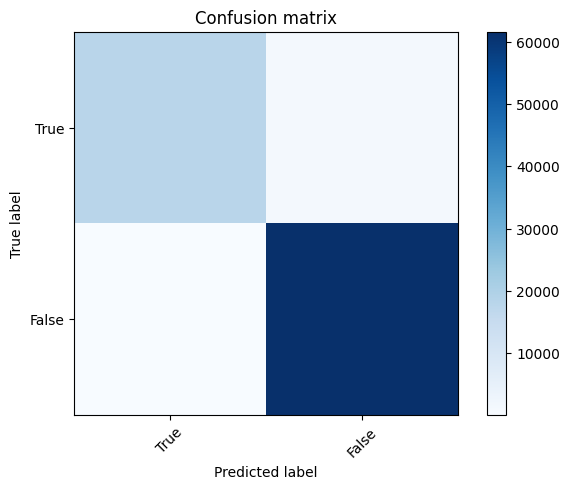

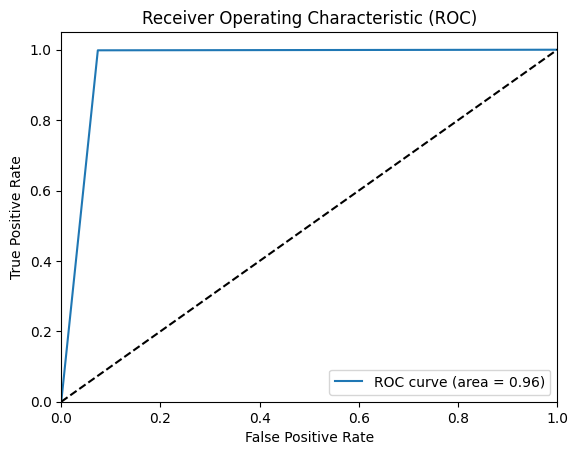

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 6s - 9ms/step - accuracy: 0.9747 - loss: 0.0694 - val_accuracy: 0.9793 - val_loss: 0.0506
Epoch 2/100
635/635 - 2s - 4ms/step - accuracy: 0.9804 - loss: 0.0471 - val_accuracy: 0.9812 - val_loss: 0.0437
Epoch 3/100
635/635 - 2s - 4ms/step - accuracy: 0.9816 - loss: 0.0441 - val_accuracy: 0.9813 - val_loss: 0.0433
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9819 - loss: 0.0432 - val_accuracy: 0.9816 - val_loss: 0.0420
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9820 - loss: 0.0423 - val_accuracy: 0.9814 - val_loss: 0.0435
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9823 - loss: 0.0415 - val_accuracy: 0.9830 - val_loss: 0.0397
Epoch 7/100
635/635 - 4s - 7ms/step - accuracy: 0.9826 - loss: 0.0404 - val_accuracy: 0.9837 - val_loss: 0.0391
Epoch 8/100
635/635 - 3s - 5ms/step - accuracy: 0.9824 - loss: 0.0406 - val_accuracy: 0.9826 - val_loss: 0.0397
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9829 - loss: 0.0396 - val_accuracy: 0.9828 - val_loss: 0.0408
Epoc

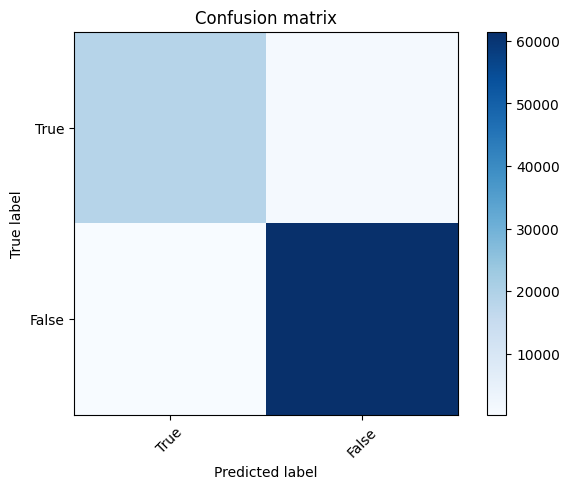

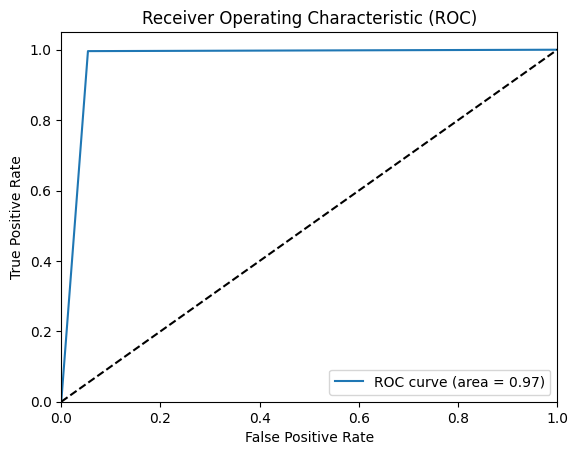

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.9620 - loss: 0.1763 - val_accuracy: 0.9772 - val_loss: 0.1013
Epoch 2/100
635/635 - 4s - 7ms/step - accuracy: 0.9776 - loss: 0.0895 - val_accuracy: 0.9776 - val_loss: 0.0810
Epoch 3/100
635/635 - 3s - 4ms/step - accuracy: 0.9777 - loss: 0.0766 - val_accuracy: 0.9778 - val_loss: 0.0729
Epoch 4/100
635/635 - 5s - 7ms/step - accuracy: 0.9777 - loss: 0.0708 - val_accuracy: 0.9772 - val_loss: 0.0722
Epoch 5/100
635/635 - 3s - 4ms/step - accuracy: 0.9777 - loss: 0.0674 - val_accuracy: 0.9778 - val_loss: 0.0658
Epoch 6/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.0649 - val_accuracy: 0.9779 - val_loss: 0.0638
Epoch 7/100
635/635 - 3s - 5ms/step - accuracy: 0.9779 - loss: 0.0629 - val_accuracy: 0.9779 - val_loss: 0.0619
Epoch 8/100
635/635 - 3s - 4ms/step - accuracy: 0.9780 - loss: 0.0611 - val_accuracy: 0.9779 - val_loss: 0.0603
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9782 - loss: 0.0595 - val_accuracy: 0.9783 - val_loss: 0.0587
Epoc

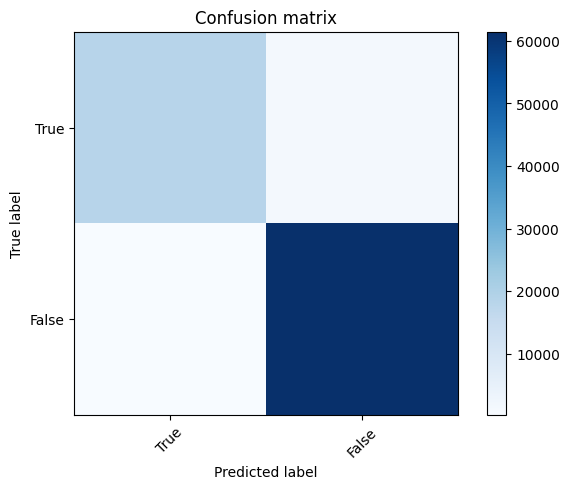

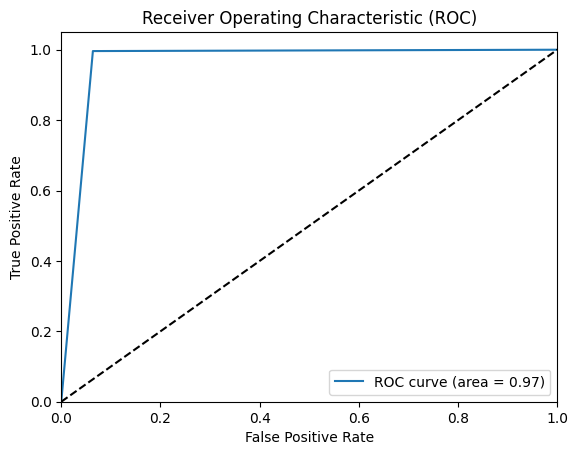

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 6s - 9ms/step - accuracy: 0.9721 - loss: 0.0953 - val_accuracy: 0.9785 - val_loss: 0.0567
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9799 - loss: 0.0486 - val_accuracy: 0.9794 - val_loss: 0.0481
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9812 - loss: 0.0453 - val_accuracy: 0.9813 - val_loss: 0.0438
Epoch 4/100
635/635 - 3s - 4ms/step - accuracy: 0.9818 - loss: 0.0439 - val_accuracy: 0.9809 - val_loss: 0.0450
Epoch 5/100
635/635 - 2s - 4ms/step - accuracy: 0.9820 - loss: 0.0431 - val_accuracy: 0.9827 - val_loss: 0.0416
Epoch 6/100
635/635 - 2s - 4ms/step - accuracy: 0.9823 - loss: 0.0425 - val_accuracy: 0.9829 - val_loss: 0.0415
Epoch 7/100
635/635 - 4s - 7ms/step - accuracy: 0.9824 - loss: 0.0418 - val_accuracy: 0.9797 - val_loss: 0.0493
Epoch 8/100
635/635 - 2s - 4ms/step - accuracy: 0.9817 - loss: 0.0422 - val_accuracy: 0.9827 - val_loss: 0.0411
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9828 - loss: 0.0408 - val_accuracy: 0.9830 - val_loss: 0.0401
Epoc

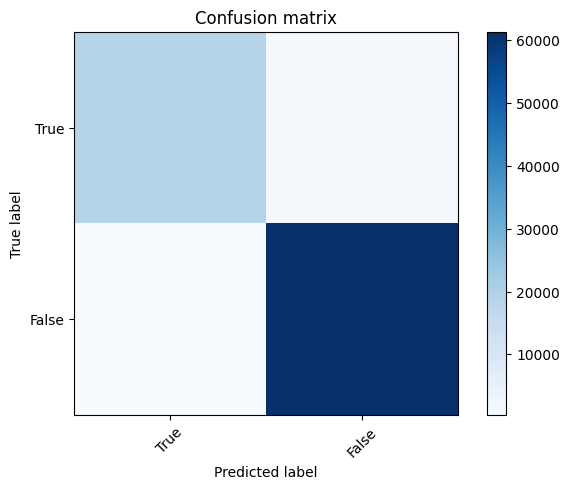

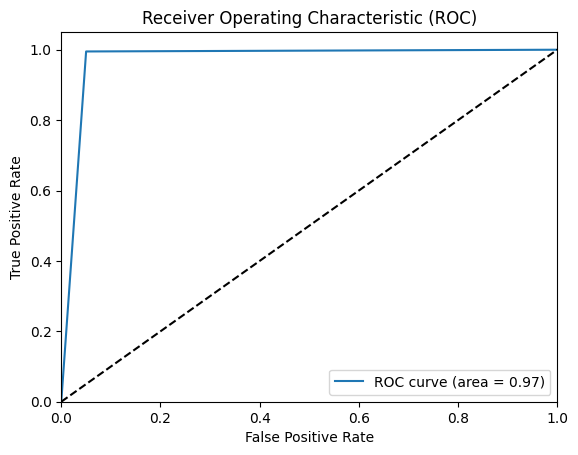

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 5s - 8ms/step - accuracy: 0.9462 - loss: 0.1796 - val_accuracy: 0.9770 - val_loss: 0.0904
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9774 - loss: 0.0807 - val_accuracy: 0.9777 - val_loss: 0.0747
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.0720 - val_accuracy: 0.9776 - val_loss: 0.0701
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9777 - loss: 0.0679 - val_accuracy: 0.9768 - val_loss: 0.0712
Epoch 5/100
635/635 - 3s - 5ms/step - accuracy: 0.9778 - loss: 0.0649 - val_accuracy: 0.9781 - val_loss: 0.0647
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9782 - loss: 0.0623 - val_accuracy: 0.9783 - val_loss: 0.0608
Epoch 7/100
635/635 - 3s - 4ms/step - accuracy: 0.9783 - loss: 0.0601 - val_accuracy: 0.9784 - val_loss: 0.0588
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9788 - loss: 0.0579 - val_accuracy: 0.9788 - val_loss: 0.0565
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9789 - loss: 0.0559 - val_accuracy: 0.9791 - val_loss: 0.0549
Epoc

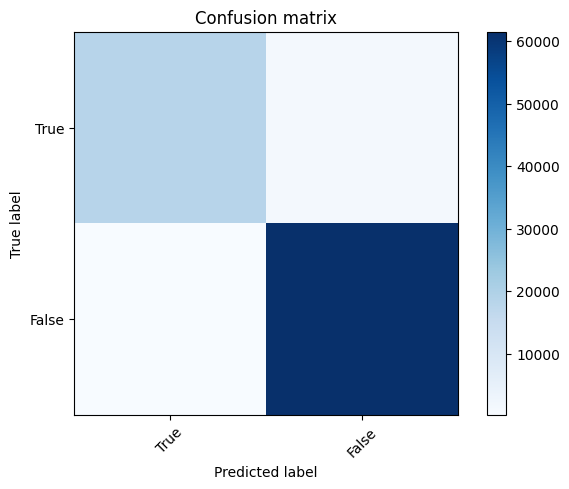

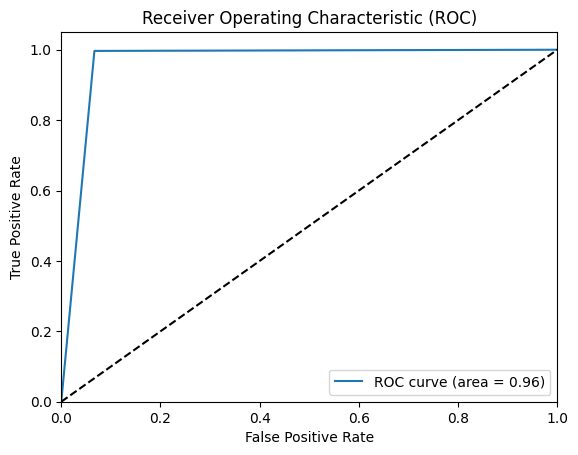

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 5s - 8ms/step - accuracy: 0.9741 - loss: 0.0731 - val_accuracy: 0.9812 - val_loss: 0.0486
Epoch 2/100
635/635 - 3s - 5ms/step - accuracy: 0.9810 - loss: 0.0467 - val_accuracy: 0.9813 - val_loss: 0.0439
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9813 - loss: 0.0443 - val_accuracy: 0.9825 - val_loss: 0.0421
Epoch 4/100
635/635 - 2s - 4ms/step - accuracy: 0.9820 - loss: 0.0426 - val_accuracy: 0.9821 - val_loss: 0.0424
Epoch 5/100
635/635 - 3s - 5ms/step - accuracy: 0.9826 - loss: 0.0415 - val_accuracy: 0.9833 - val_loss: 0.0394
Epoch 6/100
635/635 - 2s - 4ms/step - accuracy: 0.9829 - loss: 0.0410 - val_accuracy: 0.9828 - val_loss: 0.0399
Epoch 7/100
635/635 - 2s - 4ms/step - accuracy: 0.9831 - loss: 0.0399 - val_accuracy: 0.9829 - val_loss: 0.0387
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9829 - loss: 0.0395 - val_accuracy: 0.9838 - val_loss: 0.0374
Epoch 9/100
635/635 - 2s - 4ms/step - accuracy: 0.9826 - loss: 0.0391 - val_accuracy: 0.9831 - val_loss: 0.0397
Epoc

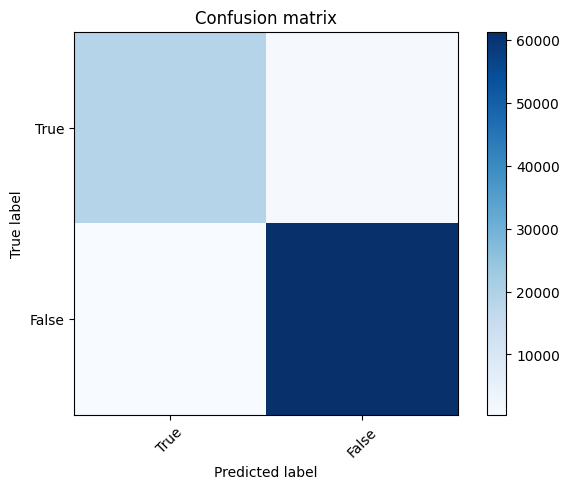

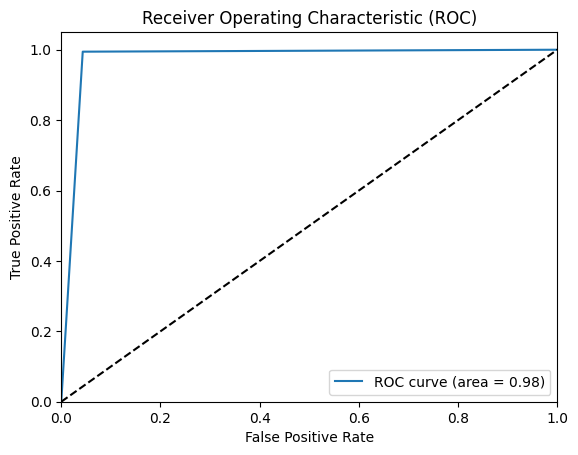

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
635/635 - 4s - 6ms/step - accuracy: 0.9201 - loss: 0.2513 - val_accuracy: 0.9770 - val_loss: 0.1059
Epoch 2/100
635/635 - 4s - 6ms/step - accuracy: 0.9772 - loss: 0.0900 - val_accuracy: 0.9775 - val_loss: 0.0805
Epoch 3/100
635/635 - 2s - 4ms/step - accuracy: 0.9774 - loss: 0.0764 - val_accuracy: 0.9775 - val_loss: 0.0730
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9776 - loss: 0.0709 - val_accuracy: 0.9775 - val_loss: 0.0691
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9777 - loss: 0.0676 - val_accuracy: 0.9778 - val_loss: 0.0661
Epoch 6/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.0651 - val_accuracy: 0.9780 - val_loss: 0.0638
Epoch 7/100
635/635 - 3s - 5ms/step - accuracy: 0.9781 - loss: 0.0628 - val_accuracy: 0.9781 - val_loss: 0.0619
Epoch 8/100
635/635 - 5s - 7ms/step - accuracy: 0.9782 - loss: 0.0609 - val_accuracy: 0.9784 - val_loss: 0.0599
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9784 - loss: 0.0591 - val_accuracy: 0.9784 - val_loss:

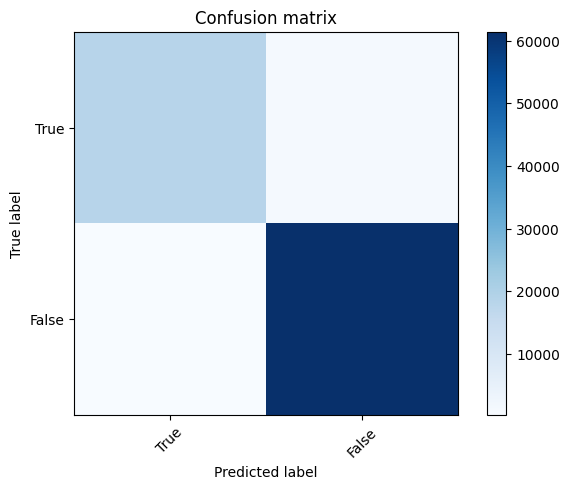

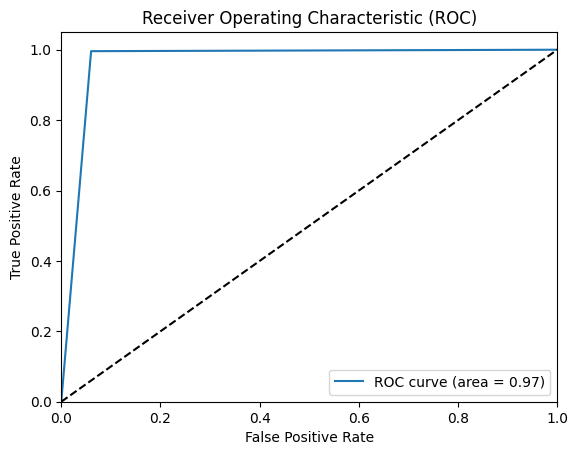

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 5s - 7ms/step - accuracy: 0.9735 - loss: 0.0682 - val_accuracy: 0.9812 - val_loss: 0.0491
Epoch 2/100
635/635 - 2s - 4ms/step - accuracy: 0.9809 - loss: 0.0454 - val_accuracy: 0.9820 - val_loss: 0.0437
Epoch 3/100
635/635 - 3s - 5ms/step - accuracy: 0.9817 - loss: 0.0432 - val_accuracy: 0.9816 - val_loss: 0.0444
Epoch 4/100
635/635 - 2s - 4ms/step - accuracy: 0.9818 - loss: 0.0429 - val_accuracy: 0.9831 - val_loss: 0.0394
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9824 - loss: 0.0412 - val_accuracy: 0.9838 - val_loss: 0.0386
Epoch 6/100
635/635 - 3s - 5ms/step - accuracy: 0.9827 - loss: 0.0401 - val_accuracy: 0.9830 - val_loss: 0.0391
Epoch 7/100
635/635 - 2s - 3ms/step - accuracy: 0.9825 - loss: 0.0404 - val_accuracy: 0.9836 - val_loss: 0.0386
Epoch 8/100
635/635 - 3s - 4ms/step - accuracy: 0.9831 - loss: 0.0391 - val_accuracy: 0.9831 - val_loss: 0.0386
Epoch 9/100
635/635 - 3s - 5ms/step - accuracy: 0.9831 - loss: 0.0390 - val_accuracy: 0.9831 - val_loss: 0.0397
Epoc

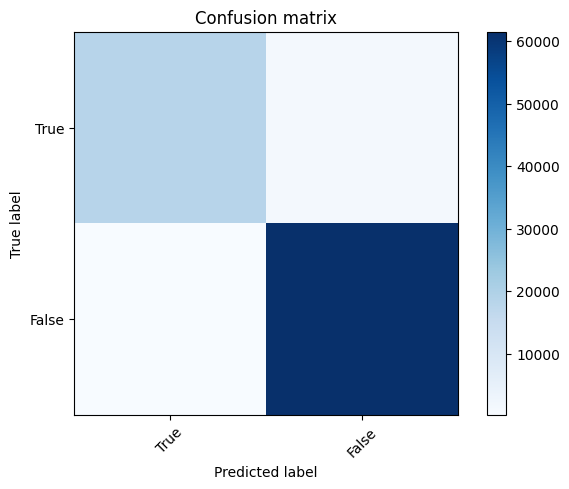

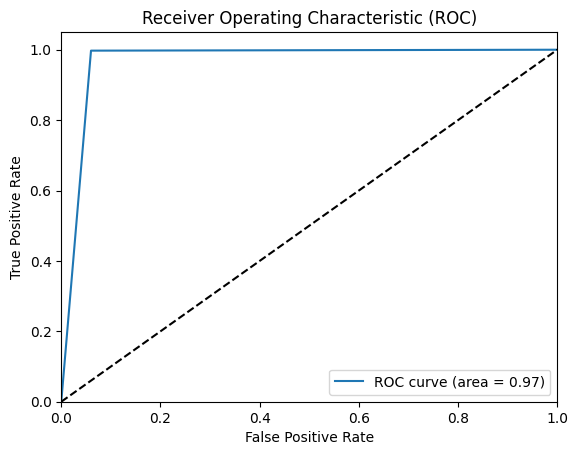

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 4s - 7ms/step - accuracy: 0.9569 - loss: 0.1780 - val_accuracy: 0.9770 - val_loss: 0.0970
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9774 - loss: 0.0853 - val_accuracy: 0.9779 - val_loss: 0.0769
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.0722 - val_accuracy: 0.9779 - val_loss: 0.0684
Epoch 4/100
635/635 - 3s - 4ms/step - accuracy: 0.9781 - loss: 0.0660 - val_accuracy: 0.9778 - val_loss: 0.0642
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9782 - loss: 0.0621 - val_accuracy: 0.9783 - val_loss: 0.0606
Epoch 6/100
635/635 - 3s - 5ms/step - accuracy: 0.9783 - loss: 0.0592 - val_accuracy: 0.9786 - val_loss: 0.0580
Epoch 7/100
635/635 - 4s - 7ms/step - accuracy: 0.9788 - loss: 0.0566 - val_accuracy: 0.9787 - val_loss: 0.0555
Epoch 8/100
635/635 - 3s - 4ms/step - accuracy: 0.9789 - loss: 0.0544 - val_accuracy: 0.9787 - val_loss: 0.0538
Epoch 9/100
635/635 - 2s - 4ms/step - accuracy: 0.9791 - loss: 0.0524 - val_accuracy: 0.9794 - val_loss: 0.0511
Epoc

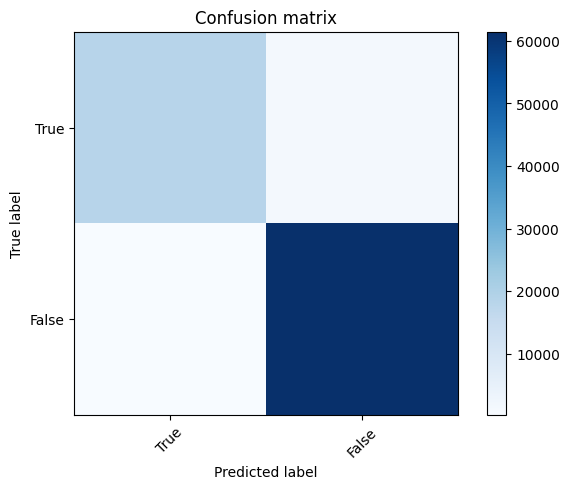

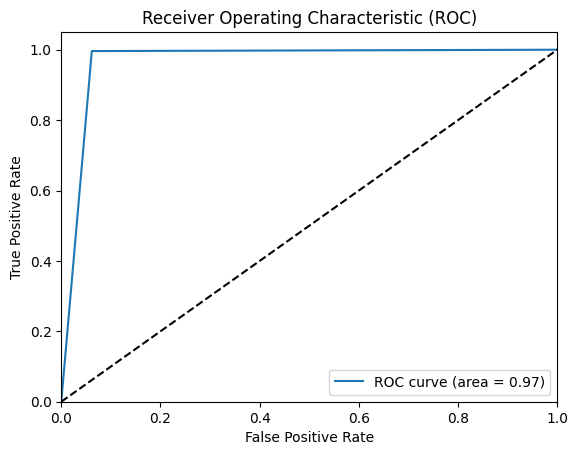

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 4s - 6ms/step - accuracy: 0.9586 - loss: 0.1728 - val_accuracy: 0.9777 - val_loss: 0.0927
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.0784 - val_accuracy: 0.9779 - val_loss: 0.0696
Epoch 3/100
635/635 - 3s - 4ms/step - accuracy: 0.9780 - loss: 0.0644 - val_accuracy: 0.9781 - val_loss: 0.0604
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9782 - loss: 0.0583 - val_accuracy: 0.9784 - val_loss: 0.0562
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9786 - loss: 0.0549 - val_accuracy: 0.9788 - val_loss: 0.0537
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9791 - loss: 0.0528 - val_accuracy: 0.9793 - val_loss: 0.0513
Epoch 7/100
635/635 - 2s - 4ms/step - accuracy: 0.9796 - loss: 0.0511 - val_accuracy: 0.9804 - val_loss: 0.0505
Epoch 8/100
635/635 - 3s - 4ms/step - accuracy: 0.9797 - loss: 0.0498 - val_accuracy: 0.9805 - val_loss: 0.0491
Epoch 9/100
635/635 - 3s - 4ms/step - accuracy: 0.9801 - loss: 0.0487 - val_accuracy: 0.9809 - val_loss: 0.0486
Epoc

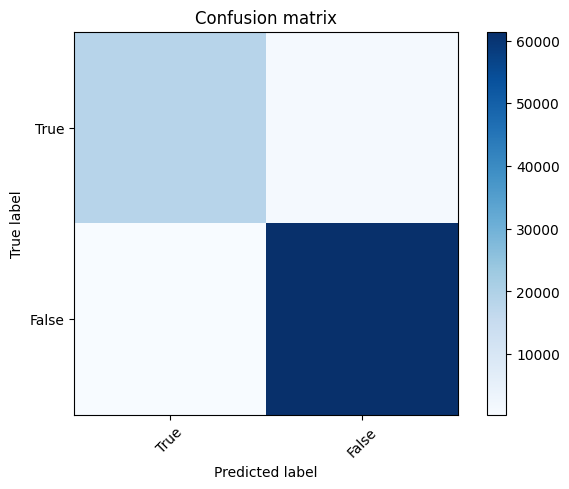

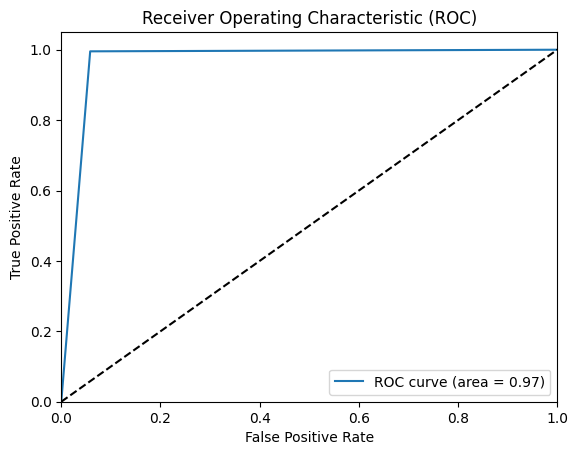

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 5s - 8ms/step - accuracy: 0.8076 - loss: 0.4020 - val_accuracy: 0.9708 - val_loss: 0.2900
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9739 - loss: 0.2337 - val_accuracy: 0.9746 - val_loss: 0.1925
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9754 - loss: 0.1706 - val_accuracy: 0.9759 - val_loss: 0.1539
Epoch 4/100
635/635 - 3s - 4ms/step - accuracy: 0.9762 - loss: 0.1438 - val_accuracy: 0.9767 - val_loss: 0.1354
Epoch 5/100
635/635 - 3s - 4ms/step - accuracy: 0.9769 - loss: 0.1296 - val_accuracy: 0.9772 - val_loss: 0.1245
Epoch 6/100
635/635 - 3s - 5ms/step - accuracy: 0.9774 - loss: 0.1206 - val_accuracy: 0.9775 - val_loss: 0.1170
Epoch 7/100
635/635 - 5s - 7ms/step - accuracy: 0.9777 - loss: 0.1141 - val_accuracy: 0.9778 - val_loss: 0.1114
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.1090 - val_accuracy: 0.9778 - val_loss: 0.1068
Epoch 9/100
635/635 - 3s - 4ms/step - accuracy: 0.9778 - loss: 0.1049 - val_accuracy: 0.9778 - val_loss: 0.1031
Epoc

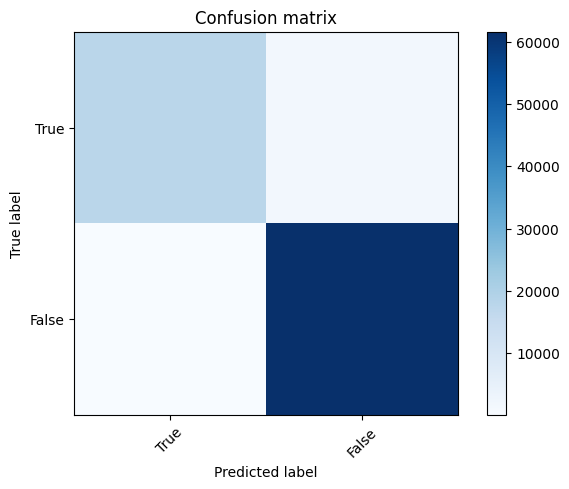

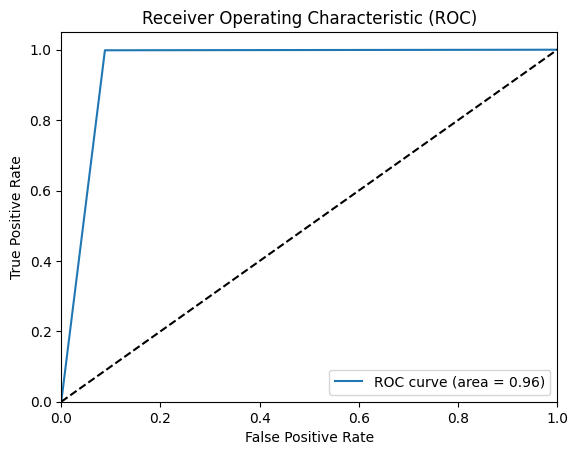

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 4s - 6ms/step - accuracy: 0.9595 - loss: 0.1570 - val_accuracy: 0.9777 - val_loss: 0.0839
Epoch 2/100
635/635 - 4s - 6ms/step - accuracy: 0.9777 - loss: 0.0725 - val_accuracy: 0.9778 - val_loss: 0.0657
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9780 - loss: 0.0614 - val_accuracy: 0.9782 - val_loss: 0.0578
Epoch 4/100
635/635 - 3s - 4ms/step - accuracy: 0.9783 - loss: 0.0565 - val_accuracy: 0.9787 - val_loss: 0.0544
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9789 - loss: 0.0536 - val_accuracy: 0.9789 - val_loss: 0.0523
Epoch 6/100
635/635 - 2s - 3ms/step - accuracy: 0.9794 - loss: 0.0516 - val_accuracy: 0.9797 - val_loss: 0.0506
Epoch 7/100
635/635 - 2s - 3ms/step - accuracy: 0.9796 - loss: 0.0499 - val_accuracy: 0.9800 - val_loss: 0.0489
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9801 - loss: 0.0490 - val_accuracy: 0.9806 - val_loss: 0.0478
Epoch 9/100
635/635 - 3s - 5ms/step - accuracy: 0.9805 - loss: 0.0477 - val_accuracy: 0.9809 - val_loss: 0.0474
Epoc

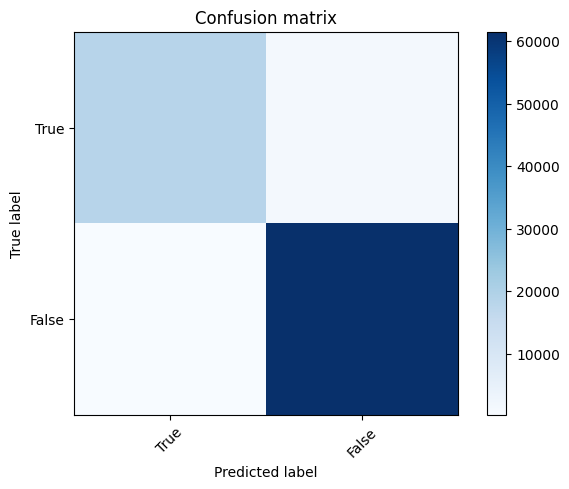

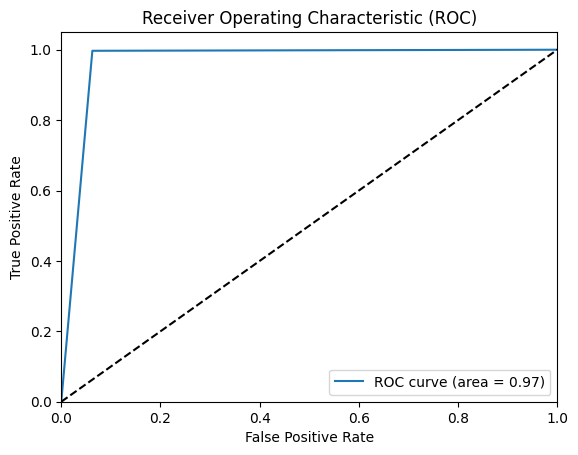

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.8297 - loss: 0.3830 - val_accuracy: 0.9734 - val_loss: 0.2607
Epoch 2/100
635/635 - 5s - 7ms/step - accuracy: 0.9755 - loss: 0.2105 - val_accuracy: 0.9760 - val_loss: 0.1754
Epoch 3/100
635/635 - 2s - 4ms/step - accuracy: 0.9763 - loss: 0.1578 - val_accuracy: 0.9768 - val_loss: 0.1444
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9771 - loss: 0.1364 - val_accuracy: 0.9774 - val_loss: 0.1297
Epoch 5/100
635/635 - 3s - 5ms/step - accuracy: 0.9775 - loss: 0.1250 - val_accuracy: 0.9776 - val_loss: 0.1208
Epoch 6/100
635/635 - 2s - 3ms/step - accuracy: 0.9776 - loss: 0.1175 - val_accuracy: 0.9776 - val_loss: 0.1144
Epoch 7/100
635/635 - 3s - 5ms/step - accuracy: 0.9776 - loss: 0.1118 - val_accuracy: 0.9776 - val_loss: 0.1094
Epoch 8/100
635/635 - 3s - 4ms/step - accuracy: 0.9776 - loss: 0.1073 - val_accuracy: 0.9775 - val_loss: 0.1052
Epoch 9/100
635/635 - 2s - 4ms/step - accuracy: 0.9775 - loss: 0.1034 - val_accuracy: 0.9776 - val_loss: 0.1017
Epoc

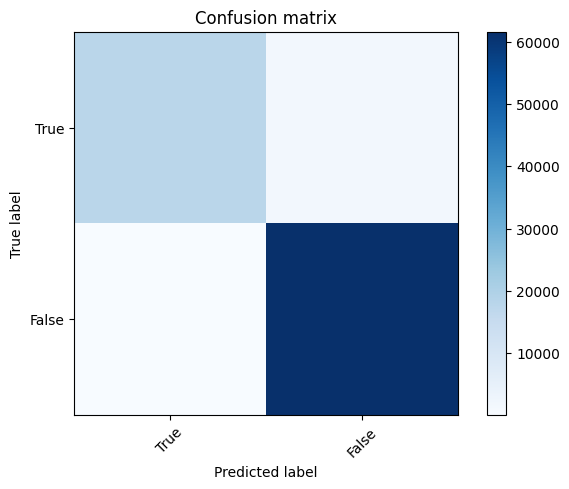

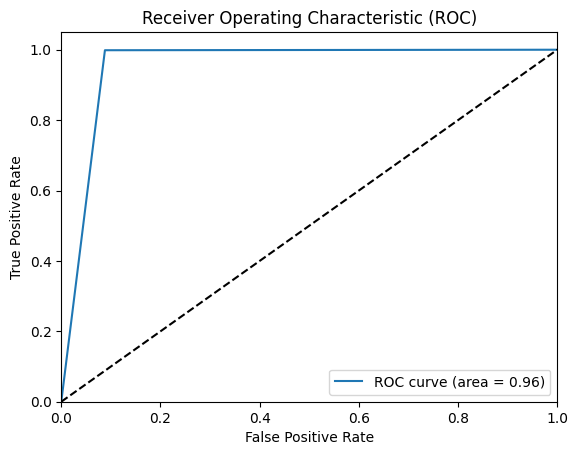

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
635/635 - 5s - 8ms/step - accuracy: 0.9634 - loss: 0.1385 - val_accuracy: 0.9777 - val_loss: 0.0757
Epoch 2/100
635/635 - 3s - 4ms/step - accuracy: 0.9777 - loss: 0.0669 - val_accuracy: 0.9782 - val_loss: 0.0604
Epoch 3/100
635/635 - 3s - 4ms/step - accuracy: 0.9782 - loss: 0.0583 - val_accuracy: 0.9786 - val_loss: 0.0567
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9788 - loss: 0.0546 - val_accuracy: 0.9795 - val_loss: 0.0541
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9791 - loss: 0.0524 - val_accuracy: 0.9795 - val_loss: 0.0514
Epoch 6/100
635/635 - 3s - 5ms/step - accuracy: 0.9796 - loss: 0.0509 - val_accuracy: 0.9799 - val_loss: 0.0494
Epoch 7/100
635/635 - 3s - 4ms/step - accuracy: 0.9801 - loss: 0.0497 - val_accuracy: 0.9802 - val_loss: 0.0483
Epoch 8/100
635/635 - 4s - 7ms/step - accuracy: 0.9803 - loss: 0.0486 - val_accuracy: 0.9803 - val_loss: 0.0473
Epoch 9/100
635/635 - 3s - 4ms/step - accuracy: 0.9803 - loss: 0.0478 - val_accuracy: 0.9808 - val_loss:

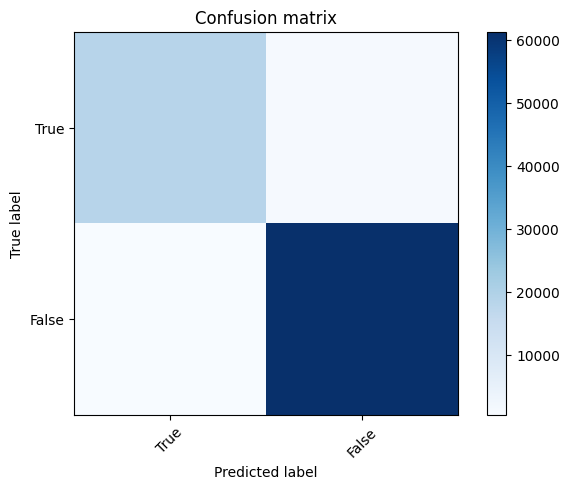

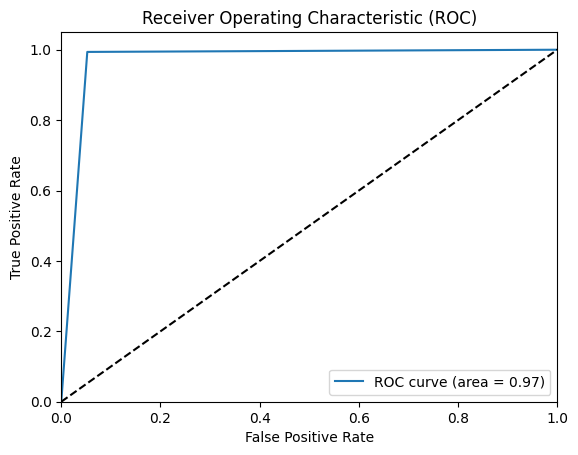

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 4s - 6ms/step - accuracy: 0.8156 - loss: 0.4014 - val_accuracy: 0.9750 - val_loss: 0.2801
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9762 - loss: 0.2195 - val_accuracy: 0.9766 - val_loss: 0.1768
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9770 - loss: 0.1562 - val_accuracy: 0.9774 - val_loss: 0.1411
Epoch 4/100
635/635 - 3s - 5ms/step - accuracy: 0.9775 - loss: 0.1325 - val_accuracy: 0.9776 - val_loss: 0.1255
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9776 - loss: 0.1208 - val_accuracy: 0.9777 - val_loss: 0.1166
Epoch 6/100
635/635 - 2s - 4ms/step - accuracy: 0.9777 - loss: 0.1135 - val_accuracy: 0.9777 - val_loss: 0.1105
Epoch 7/100
635/635 - 3s - 4ms/step - accuracy: 0.9777 - loss: 0.1081 - val_accuracy: 0.9776 - val_loss: 0.1058
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9777 - loss: 0.1039 - val_accuracy: 0.9777 - val_loss: 0.1020
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9777 - loss: 0.1003 - val_accuracy: 0.9777 - val_loss: 0.0987
Epoc

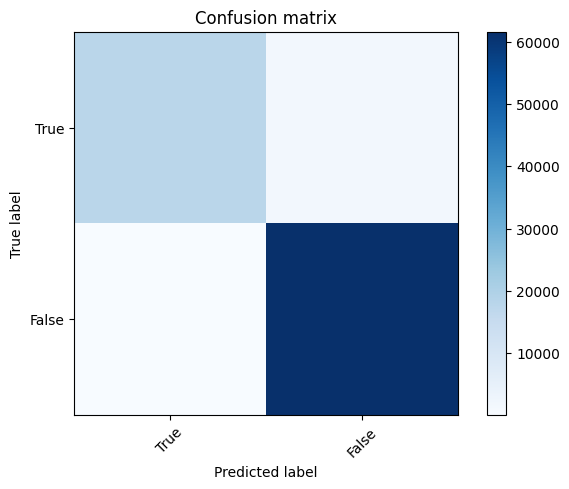

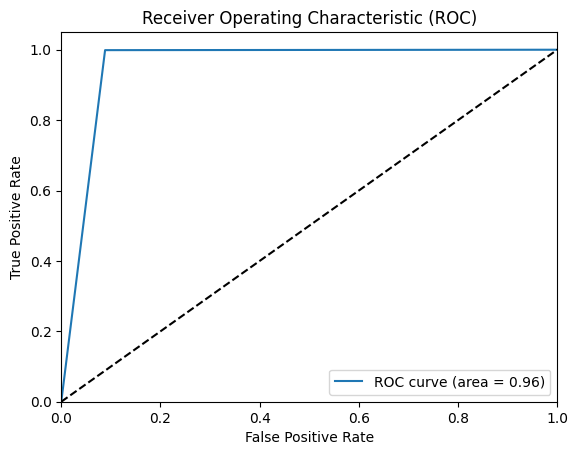

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 4s - 7ms/step - accuracy: 0.9244 - loss: 0.2091 - val_accuracy: 0.9777 - val_loss: 0.0864
Epoch 2/100
635/635 - 3s - 5ms/step - accuracy: 0.9779 - loss: 0.0730 - val_accuracy: 0.9781 - val_loss: 0.0638
Epoch 3/100
635/635 - 3s - 4ms/step - accuracy: 0.9784 - loss: 0.0594 - val_accuracy: 0.9792 - val_loss: 0.0549
Epoch 4/100
635/635 - 5s - 7ms/step - accuracy: 0.9790 - loss: 0.0535 - val_accuracy: 0.9789 - val_loss: 0.0510
Epoch 5/100
635/635 - 2s - 4ms/step - accuracy: 0.9795 - loss: 0.0501 - val_accuracy: 0.9802 - val_loss: 0.0507
Epoch 6/100
635/635 - 2s - 3ms/step - accuracy: 0.9801 - loss: 0.0485 - val_accuracy: 0.9804 - val_loss: 0.0470
Epoch 7/100
635/635 - 3s - 5ms/step - accuracy: 0.9807 - loss: 0.0471 - val_accuracy: 0.9812 - val_loss: 0.0462
Epoch 8/100
635/635 - 3s - 5ms/step - accuracy: 0.9813 - loss: 0.0459 - val_accuracy: 0.9810 - val_loss: 0.0455
Epoch 9/100
635/635 - 5s - 7ms/step - accuracy: 0.9814 - loss: 0.0454 - val_accuracy: 0.9805 - val_loss: 0.0461
Epoc

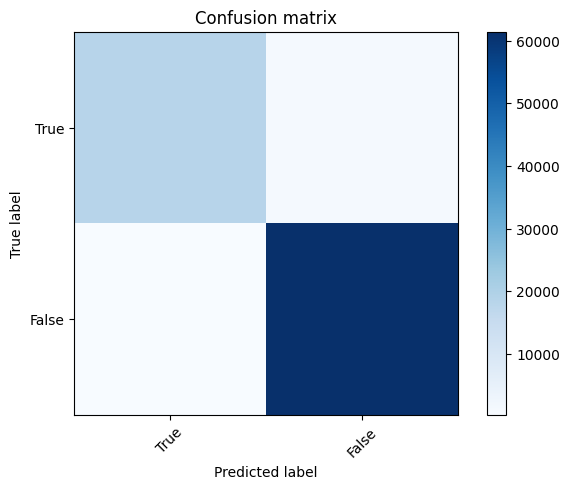

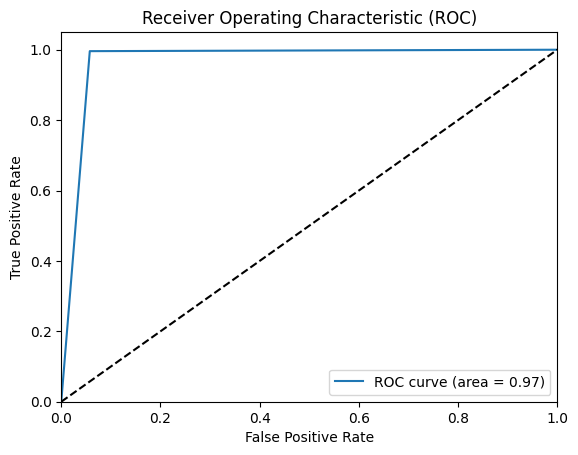

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.7448 - loss: 0.5381 - val_accuracy: 0.7599 - val_loss: 0.4972
Epoch 2/100
635/635 - 4s - 7ms/step - accuracy: 0.7599 - loss: 0.4613 - val_accuracy: 0.7599 - val_loss: 0.4207
Epoch 3/100
635/635 - 3s - 4ms/step - accuracy: 0.7843 - loss: 0.3731 - val_accuracy: 0.8689 - val_loss: 0.3238
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9533 - loss: 0.2780 - val_accuracy: 0.9769 - val_loss: 0.2361
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9770 - loss: 0.2050 - val_accuracy: 0.9767 - val_loss: 0.1792
Epoch 6/100
635/635 - 2s - 3ms/step - accuracy: 0.9769 - loss: 0.1623 - val_accuracy: 0.9770 - val_loss: 0.1485
Epoch 7/100
635/635 - 2s - 3ms/step - accuracy: 0.9770 - loss: 0.1394 - val_accuracy: 0.9770 - val_loss: 0.1318
Epoch 8/100
635/635 - 3s - 5ms/step - accuracy: 0.9772 - loss: 0.1263 - val_accuracy: 0.9773 - val_loss: 0.1216
Epoch 9/100
635/635 - 3s - 4ms/step - accuracy: 0.9774 - loss: 0.1179 - val_accuracy: 0.9775 - val_loss: 0.1146
Epoc

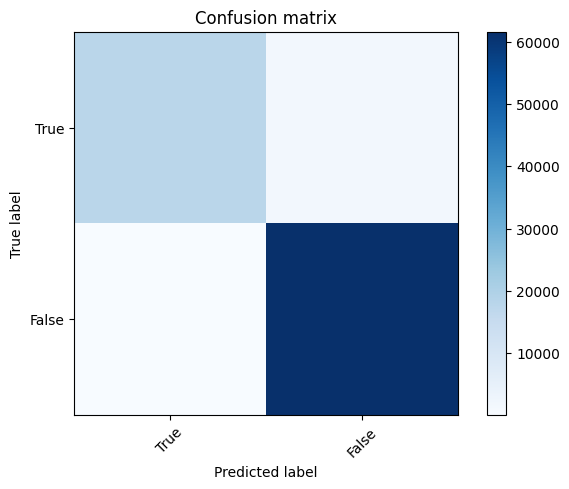

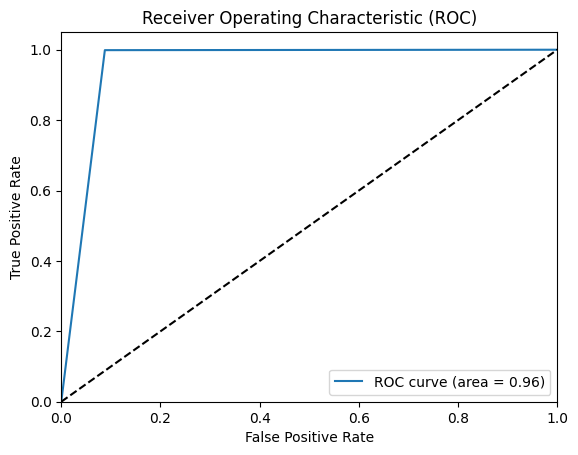

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 5s - 9ms/step - accuracy: 0.9537 - loss: 0.1435 - val_accuracy: 0.9776 - val_loss: 0.0682
Epoch 2/100
635/635 - 2s - 4ms/step - accuracy: 0.9780 - loss: 0.0614 - val_accuracy: 0.9784 - val_loss: 0.0564
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9786 - loss: 0.0543 - val_accuracy: 0.9790 - val_loss: 0.0528
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9799 - loss: 0.0506 - val_accuracy: 0.9804 - val_loss: 0.0487
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9800 - loss: 0.0493 - val_accuracy: 0.9808 - val_loss: 0.0492
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9806 - loss: 0.0476 - val_accuracy: 0.9816 - val_loss: 0.0466
Epoch 7/100
635/635 - 3s - 4ms/step - accuracy: 0.9811 - loss: 0.0470 - val_accuracy: 0.9813 - val_loss: 0.0453
Epoch 8/100
635/635 - 2s - 4ms/step - accuracy: 0.9812 - loss: 0.0460 - val_accuracy: 0.9813 - val_loss: 0.0446
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9811 - loss: 0.0454 - val_accuracy: 0.9812 - val_loss: 0.0447
Epoc

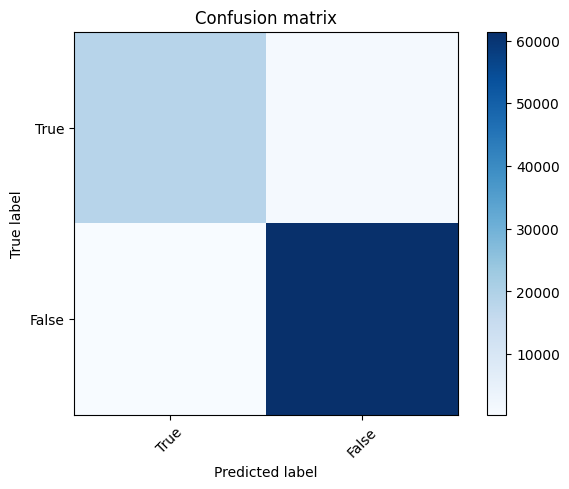

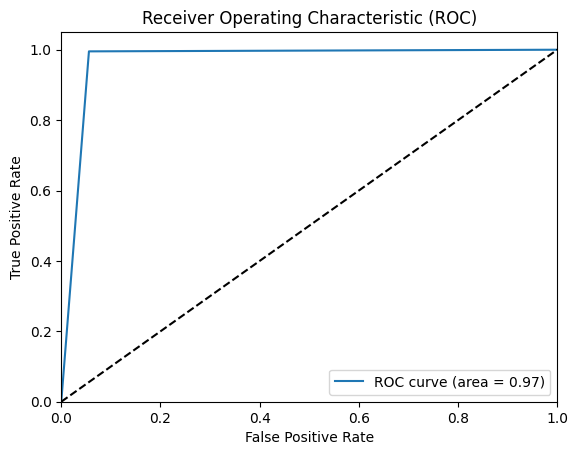

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.7599 - loss: 0.5139 - val_accuracy: 0.7599 - val_loss: 0.4745
Epoch 2/100
635/635 - 4s - 6ms/step - accuracy: 0.7601 - loss: 0.4265 - val_accuracy: 0.7624 - val_loss: 0.3735
Epoch 3/100
635/635 - 3s - 5ms/step - accuracy: 0.8855 - loss: 0.3191 - val_accuracy: 0.9773 - val_loss: 0.2679
Epoch 4/100
635/635 - 3s - 4ms/step - accuracy: 0.9772 - loss: 0.2283 - val_accuracy: 0.9771 - val_loss: 0.1952
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9768 - loss: 0.1741 - val_accuracy: 0.9769 - val_loss: 0.1573
Epoch 6/100
635/635 - 2s - 3ms/step - accuracy: 0.9772 - loss: 0.1468 - val_accuracy: 0.9773 - val_loss: 0.1383
Epoch 7/100
635/635 - 2s - 3ms/step - accuracy: 0.9774 - loss: 0.1325 - val_accuracy: 0.9774 - val_loss: 0.1275
Epoch 8/100
635/635 - 3s - 5ms/step - accuracy: 0.9774 - loss: 0.1237 - val_accuracy: 0.9774 - val_loss: 0.1203
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.9774 - loss: 0.1175 - val_accuracy: 0.9774 - val_loss: 0.1149
Epoc

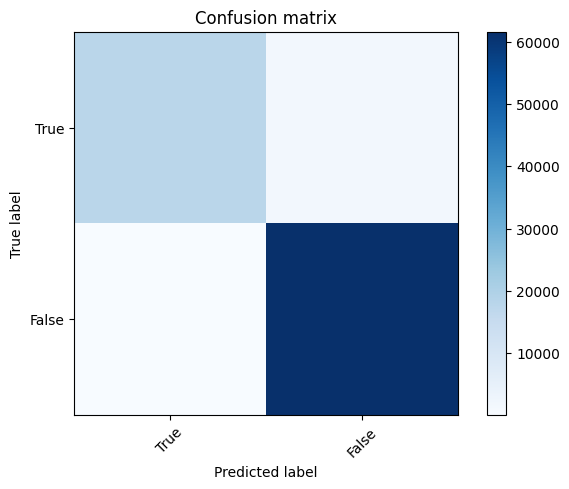

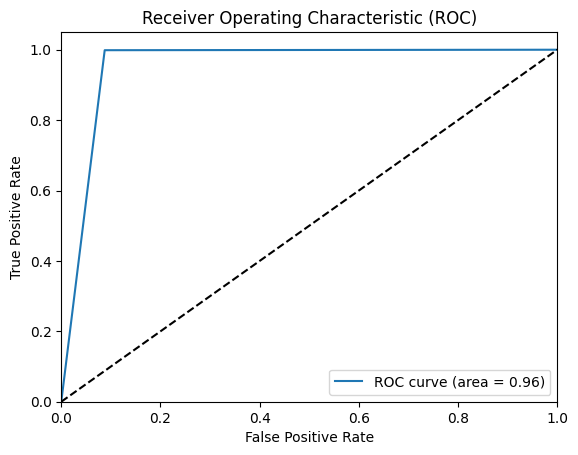

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 6s - 9ms/step - accuracy: 0.9643 - loss: 0.1135 - val_accuracy: 0.9782 - val_loss: 0.0600
Epoch 2/100
635/635 - 2s - 4ms/step - accuracy: 0.9781 - loss: 0.0576 - val_accuracy: 0.9786 - val_loss: 0.0577
Epoch 3/100
635/635 - 2s - 4ms/step - accuracy: 0.9789 - loss: 0.0536 - val_accuracy: 0.9795 - val_loss: 0.0519
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9793 - loss: 0.0515 - val_accuracy: 0.9806 - val_loss: 0.0489
Epoch 5/100
635/635 - 3s - 4ms/step - accuracy: 0.9797 - loss: 0.0506 - val_accuracy: 0.9802 - val_loss: 0.0493
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9801 - loss: 0.0493 - val_accuracy: 0.9779 - val_loss: 0.0550
Epoch 7/100
635/635 - 3s - 4ms/step - accuracy: 0.9804 - loss: 0.0483 - val_accuracy: 0.9813 - val_loss: 0.0457
Epoch 8/100
635/635 - 4s - 6ms/step - accuracy: 0.9809 - loss: 0.0472 - val_accuracy: 0.9812 - val_loss: 0.0451
Epoch 9/100
635/635 - 3s - 5ms/step - accuracy: 0.9806 - loss: 0.0464 - val_accuracy: 0.9808 - val_loss: 0.0479
Epoc

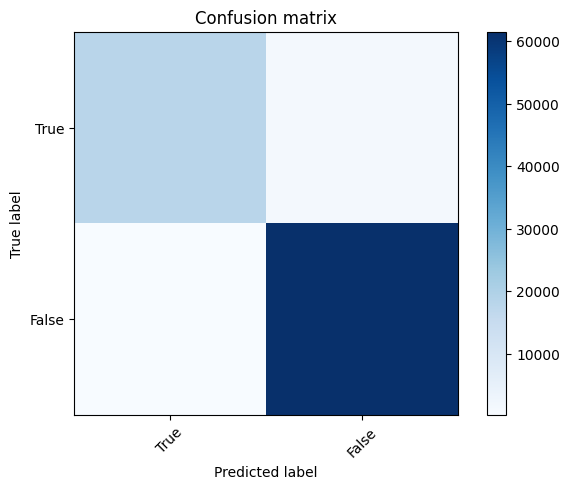

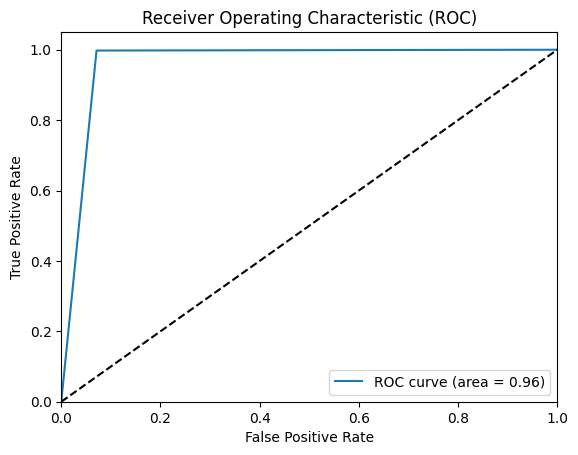

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 5s - 8ms/step - accuracy: 0.7564 - loss: 0.5160 - val_accuracy: 0.7599 - val_loss: 0.4726
Epoch 2/100
635/635 - 2s - 4ms/step - accuracy: 0.7608 - loss: 0.4211 - val_accuracy: 0.7606 - val_loss: 0.3655
Epoch 3/100
635/635 - 2s - 3ms/step - accuracy: 0.9032 - loss: 0.3072 - val_accuracy: 0.9765 - val_loss: 0.2532
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9756 - loss: 0.2139 - val_accuracy: 0.9760 - val_loss: 0.1822
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.9758 - loss: 0.1633 - val_accuracy: 0.9764 - val_loss: 0.1488
Epoch 6/100
635/635 - 3s - 5ms/step - accuracy: 0.9765 - loss: 0.1398 - val_accuracy: 0.9768 - val_loss: 0.1325
Epoch 7/100
635/635 - 3s - 4ms/step - accuracy: 0.9771 - loss: 0.1276 - val_accuracy: 0.9773 - val_loss: 0.1232
Epoch 8/100
635/635 - 4s - 7ms/step - accuracy: 0.9774 - loss: 0.1198 - val_accuracy: 0.9775 - val_loss: 0.1167
Epoch 9/100
635/635 - 2s - 4ms/step - accuracy: 0.9775 - loss: 0.1140 - val_accuracy: 0.9776 - val_loss: 0.1115
Epoc

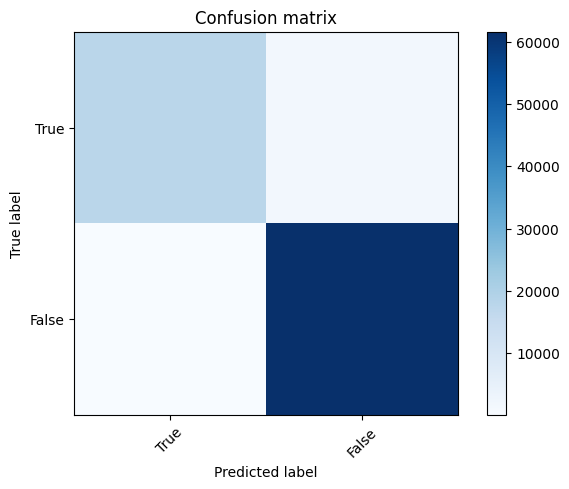

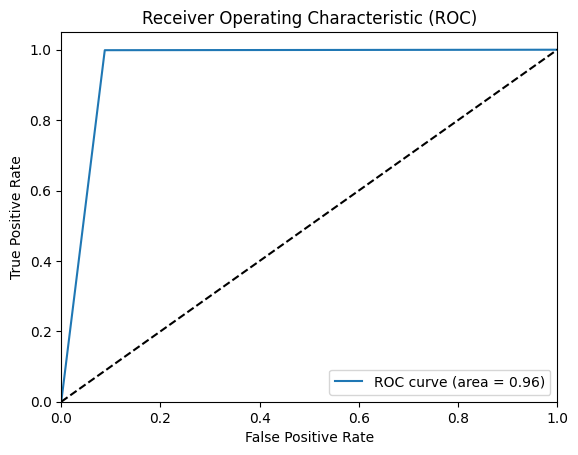

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 6s - 9ms/step - accuracy: 0.9352 - loss: 0.1844 - val_accuracy: 0.9781 - val_loss: 0.0756
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.9778 - loss: 0.0653 - val_accuracy: 0.9791 - val_loss: 0.0562
Epoch 3/100
635/635 - 2s - 4ms/step - accuracy: 0.9786 - loss: 0.0542 - val_accuracy: 0.9795 - val_loss: 0.0509
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.9796 - loss: 0.0508 - val_accuracy: 0.9801 - val_loss: 0.0491
Epoch 5/100
635/635 - 2s - 4ms/step - accuracy: 0.9803 - loss: 0.0488 - val_accuracy: 0.9811 - val_loss: 0.0471
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.9804 - loss: 0.0476 - val_accuracy: 0.9816 - val_loss: 0.0460
Epoch 7/100
635/635 - 4s - 7ms/step - accuracy: 0.9808 - loss: 0.0466 - val_accuracy: 0.9818 - val_loss: 0.0452
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9812 - loss: 0.0460 - val_accuracy: 0.9814 - val_loss: 0.0446
Epoch 9/100
635/635 - 2s - 4ms/step - accuracy: 0.9815 - loss: 0.0451 - val_accuracy: 0.9821 - val_loss: 0.0440
Epoc

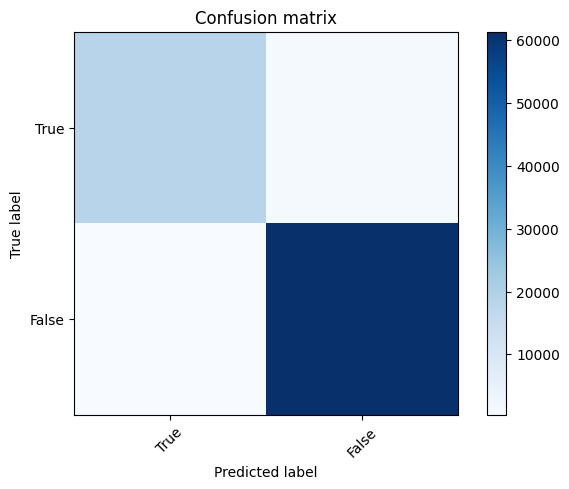

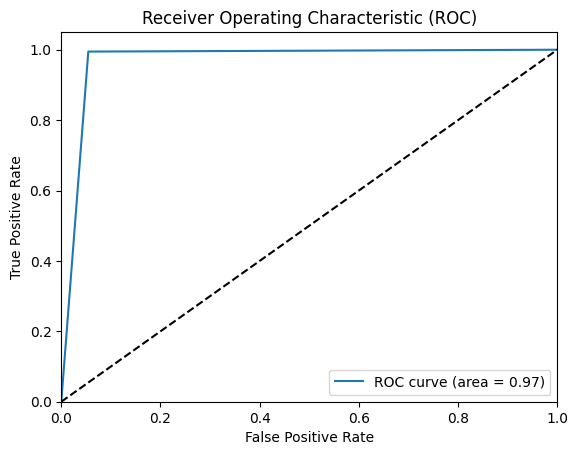

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.7395 - loss: 0.5667 - val_accuracy: 0.7599 - val_loss: 0.5494
Epoch 2/100
635/635 - 5s - 7ms/step - accuracy: 0.7599 - loss: 0.5476 - val_accuracy: 0.7599 - val_loss: 0.5456
Epoch 3/100
635/635 - 4s - 7ms/step - accuracy: 0.7599 - loss: 0.5434 - val_accuracy: 0.7599 - val_loss: 0.5409
Epoch 4/100
635/635 - 2s - 3ms/step - accuracy: 0.7599 - loss: 0.5378 - val_accuracy: 0.7599 - val_loss: 0.5343
Epoch 5/100
635/635 - 2s - 3ms/step - accuracy: 0.7599 - loss: 0.5297 - val_accuracy: 0.7599 - val_loss: 0.5244
Epoch 6/100
635/635 - 3s - 4ms/step - accuracy: 0.7599 - loss: 0.5172 - val_accuracy: 0.7599 - val_loss: 0.5087
Epoch 7/100
635/635 - 3s - 5ms/step - accuracy: 0.7599 - loss: 0.4966 - val_accuracy: 0.7599 - val_loss: 0.4822
Epoch 8/100
635/635 - 2s - 4ms/step - accuracy: 0.7599 - loss: 0.4623 - val_accuracy: 0.7599 - val_loss: 0.4390
Epoch 9/100
635/635 - 2s - 3ms/step - accuracy: 0.7599 - loss: 0.4089 - val_accuracy: 0.7599 - val_loss: 0.3753
Epoc

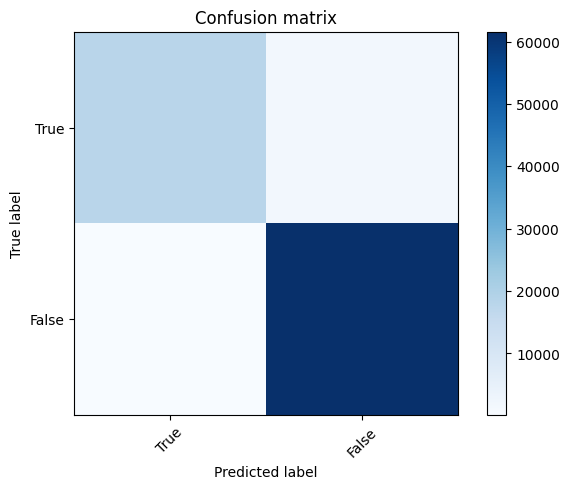

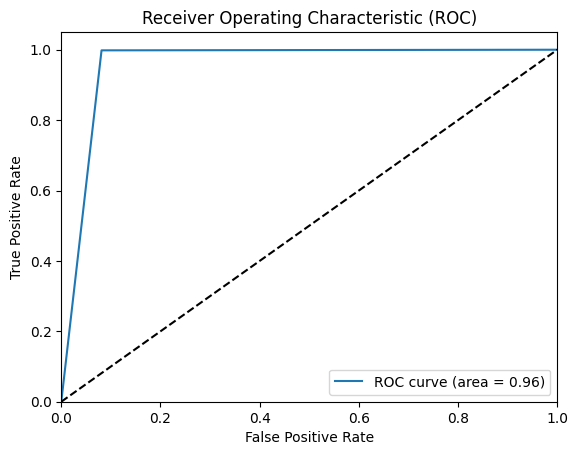

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 6s - 10ms/step - accuracy: 0.9556 - loss: 0.1283 - val_accuracy: 0.9783 - val_loss: 0.0591
Epoch 2/100
635/635 - 7s - 11ms/step - accuracy: 0.9786 - loss: 0.0556 - val_accuracy: 0.9794 - val_loss: 0.0544
Epoch 3/100
635/635 - 2s - 4ms/step - accuracy: 0.9796 - loss: 0.0518 - val_accuracy: 0.9792 - val_loss: 0.0527
Epoch 4/100
635/635 - 4s - 6ms/step - accuracy: 0.9803 - loss: 0.0496 - val_accuracy: 0.9797 - val_loss: 0.0498
Epoch 5/100
635/635 - 3s - 5ms/step - accuracy: 0.9805 - loss: 0.0487 - val_accuracy: 0.9817 - val_loss: 0.0459
Epoch 6/100
635/635 - 2s - 3ms/step - accuracy: 0.9807 - loss: 0.0474 - val_accuracy: 0.9814 - val_loss: 0.0460
Epoch 7/100
635/635 - 2s - 4ms/step - accuracy: 0.9807 - loss: 0.0474 - val_accuracy: 0.9817 - val_loss: 0.0444
Epoch 8/100
635/635 - 2s - 4ms/step - accuracy: 0.9810 - loss: 0.0461 - val_accuracy: 0.9814 - val_loss: 0.0463
Epoch 9/100
635/635 - 3s - 5ms/step - accuracy: 0.9809 - loss: 0.0456 - val_accuracy: 0.9819 - val_loss: 0.0443
Ep

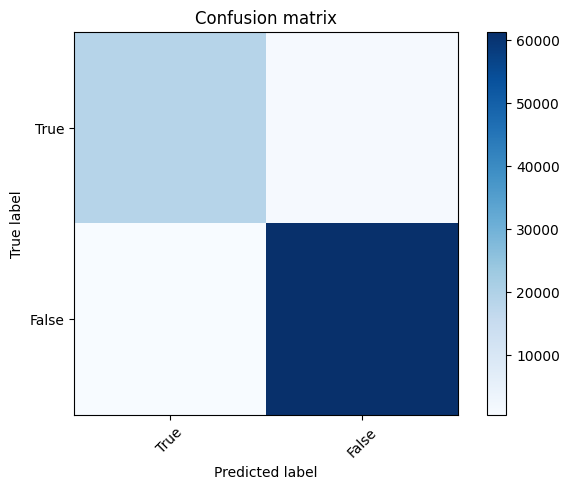

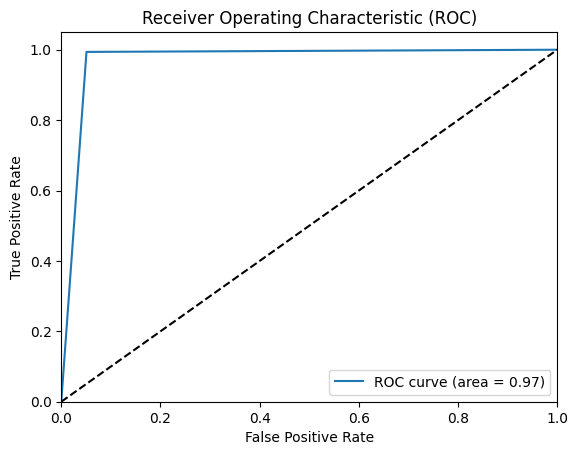

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


635/635 - 3s - 5ms/step - accuracy: 0.7599 - loss: 0.5462 - val_accuracy: 0.7599 - val_loss: 0.5429
Epoch 2/100
635/635 - 2s - 3ms/step - accuracy: 0.7599 - loss: 0.5392 - val_accuracy: 0.7599 - val_loss: 0.5353
Epoch 3/100
635/635 - 2s - 4ms/step - accuracy: 0.7599 - loss: 0.5301 - val_accuracy: 0.7599 - val_loss: 0.5238
Epoch 4/100
635/635 - 2s - 4ms/step - accuracy: 0.7599 - loss: 0.5150 - val_accuracy: 0.7599 - val_loss: 0.5041
Epoch 5/100
635/635 - 3s - 4ms/step - accuracy: 0.7599 - loss: 0.4879 - val_accuracy: 0.7599 - val_loss: 0.4679
Epoch 6/100
635/635 - 4s - 7ms/step - accuracy: 0.7599 - loss: 0.4393 - val_accuracy: 0.7599 - val_loss: 0.4056
Epoch 7/100
635/635 - 2s - 3ms/step - accuracy: 0.7848 - loss: 0.3639 - val_accuracy: 0.8799 - val_loss: 0.3193
Epoch 8/100
635/635 - 2s - 3ms/step - accuracy: 0.9611 - loss: 0.2745 - val_accuracy: 0.9776 - val_loss: 0.2320
Epoch 9/100
635/635 - 3s - 5ms/step - accuracy: 0.9772 - loss: 0.1995 - val_accuracy: 0.9769 - val_loss: 0.1725
Epoc

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import ParameterGrid

path = "./data/"
save_path = "./dnn/"

os.makedirs(save_path, exist_ok=True)  # Create the directory if it doesn't exist

# save best model
checkpointer = ModelCheckpoint(filepath="dnn/best_weights.keras", verbose=0, save_best_only=True)

# create hyperparameter grid
param_grid = ParameterGrid(
    {
        "activation": ["relu", "sigmoid", "tanh"],
        "layer_count": [1, 2, 3],
        "neuron_count": [32, 64, 128],
        "optimizer": ["adam", "sgd"]
    }
)

results = []

for params in param_grid:
    model = Sequential()

    for _ in range(params["layer_count"]):
        model.add( Dense(
                params["neuron_count"],
                input_dim=XTrain.shape[1],
                activation=params["activation"],
            )
        )
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=params["optimizer"], loss="binary_crossentropy", metrics=["accuracy"]
    )

    # apply earlystopping
    monitor = EarlyStopping(
        monitor="val_loss", min_delta=1e-3, patience=5, verbose=1, mode="auto"
    )

    # save the best model
    checkpointer = ModelCheckpoint(
        filepath="dnn/best_weights.keras", verbose=0, save_best_only=True
    )

    # fit the model with batch size 128
    model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        batch_size=128,
        callbacks=[monitor, checkpointer],
        verbose=2,
        epochs=100
    )

  # load weights from best model
    model.load_weights("dnn/best_weights.keras")

    # Predict and measure RMSE
    pred = model.predict(x_test)
    round = lambda x: 1 if x > 0.5 else 0
    vfunc = np.vectorize(round)
    pred = vfunc(pred)
    # pred=pred.flatten()

    score = metrics.accuracy_score(y_test, pred)
    print("Accuracy score: {}".format(score))

    score = metrics.precision_score(y_test, pred, average="weighted")
    print("Precision score: {}".format(score))

    score = metrics.recall_score(y_test, pred, average="weighted")
    print("Recall score: {}".format(score))

    score = metrics.f1_score(y_test, pred, average="weighted")
    print("F1 score: {}".format(score))


    score = metrics.log_loss(y_test, pred)
    print("Log loss score: {}".format(score))

    print(metrics.classification_report(y_test, pred))

    # Plot the charts
    mat = metrics.confusion_matrix(y_test, pred.flatten())
    labels = ["True", "False"]
    plot_confusion_matrix(mat, labels)
    plot_roc(pred.flatten(), y_test)

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Save result to display at the end
    results.append(
        {
            "activation": params["activation"],
            "layer_count": params["layer_count"],
            "neuron_count": params["neuron_count"],
            "optimizer": params["optimizer"],
            "accuracy": accuracy,
            "loss": loss,
            "RMSE": score,
        }
    )